In [3]:
#from pygsti.models.modelnoise import DepolarizationNoise
import itertools
import os
from functools import partial
import numpy as np
from numpy import pi, sin, cos, tan, arcsin, arccos, arctan2, sqrt, exp
from numpy.linalg import norm
import scipy.optimize as opt
from scipy.stats import uniform_direction
import pygsti
from pygsti.circuits import Circuit
import matplotlib.pyplot as plt
from matplotlib import cm
from multiprocessing import Pool #, set_start_method, get_context
import pickle
#set_start_method("spawn")
#from reset import *
#from detection_rate_functions import *
#from math_objects import hamming_weight

In [2]:
ZZ_rates = np.logspace(-5,0,100,base=10)

torino_detection_rates1 = [0.9952272261364272, 0.9952434447786948, 0.9952235093910221, 0.9951960515814006, 0.9952170319357369, 0.995236110960454, 0.995363569840563, 0.9951711714645468, 0.99520682468011, 0.9951935533877861, 0.9951834890766126, 0.9952003148676435, 0.9952275372090614, 0.9953070024884542, 0.9952576332924039, 0.9952145076796336, 0.9951694393968421, 0.9952106404638517, 0.9952234826558929, 0.9952436164119202, 0.9951832460886247, 0.9952556860583616, 0.9952602475300424, 0.9951968974905216, 0.9952413544055563, 0.9952036197294892, 0.9952598563935975, 0.9952100118303339, 0.9951908562382943, 0.9952183503325323, 0.9952051544694559, 0.9951985956989735, 0.9952520012085907, 0.9951247789998797, 0.9951516473810692, 0.9952362002414731, 0.9951714880154295, 0.9951984290879645, 0.9952393926502549, 0.995248976840816, 0.99521337879419, 0.9952150004529908, 0.9952130867356799, 0.9951644286229343, 0.9950731346162321, 0.9951394140248921, 0.995232333816681, 0.9951631799094087, 0.9951680029658252, 0.9950665808695812, 0.9949635853050677, 0.9949967314556999, 0.9949378746239094, 0.9949289725730063, 0.9947088970647323, 0.9946119032593022, 0.9943953696225626, 0.9942167652060196, 0.9939350630721464, 0.9937182851997464, 0.9927504704725207, 0.992948992323717, 0.9918128554855212, 0.9917572578965625, 0.9907482371623617, 0.9889246407388432, 0.9880297434345355, 0.9855298759422167, 0.9823301803699789, 0.9793555410930774, 0.9753323398370953, 0.9733880833429719, 0.9634310824953399, 0.9614176212494744, 0.9430269181359681, 0.9338138055803209, 0.9225401436293922, 0.8926155751791753, 0.8536533097448854, 0.859655262094946, 0.8134175441865765, 0.7237175587195196, 0.7870733866376441, 0.7087843767507636, 0.5993615801582486, 0.6224820641727711, 0.5501906634446148, 0.5594786508529243, 0.46723466614864706, 0.5051843819143981, 0.4802194916359789, 0.4693017923198044, 0.5096220082784207, 0.5515583311735023, 0.5271620057892685, 0.5147035611398662, 0.5011974582712123, 0.485332940655459, 0.5096947963893279, 0.5123328779570211]
torino_detection_rates2 = [0.9975729753138117, 0.9976154031560455, 0.9975719871438102, 0.9975983967220362, 0.9976005137015815, 0.9975942365448123, 0.9975271857241574, 0.9975918913818166, 0.9976356425896412, 0.9975899485635044, 0.9975508826923254, 0.9976067917793499, 0.9975950206640767, 0.9975547488466019, 0.9975893058365886, 0.9975448082027557, 0.9975405825851013, 0.9975613009158912, 0.9975672905274705, 0.997538585443179, 0.9975917081476764, 0.9975240278968162, 0.9975804493711383, 0.997585047340083, 0.9975927855852365, 0.9976180217970146, 0.9975345862930496, 0.997577436441508, 0.997596664006296, 0.9975870622737006, 0.9975882563570899, 0.9975762170501494, 0.9975867511235943, 0.9975641764106205, 0.9975782450042106, 0.9976070206698431, 0.9976304382523807, 0.9975921259416881, 0.9975822520722475, 0.9975229895116199, 0.9975869125866734, 0.9975589882451256, 0.9976051104833548, 0.9975573594843978, 0.9975391576849527, 0.9974668016032554, 0.9974400186936176, 0.9974663399467674, 0.9974552286037036, 0.9974316754493714, 0.9974541560866055, 0.9973825158191022, 0.9972746271977995, 0.9971951139381048, 0.997116037750435, 0.9971265723963749, 0.9967261790358637, 0.9967985881073791, 0.9966163857773798, 0.9960598643107573, 0.9961639707711292, 0.9952072583618721, 0.9944278213201646, 0.9935725471075199, 0.9933514326948781, 0.9913208825470697, 0.9907663998021207, 0.9882822651195261, 0.9870245358112245, 0.9832457925256014, 0.9828175095791686, 0.9744958280064686, 0.9683197484794982, 0.9608683109555878, 0.9470490701137129, 0.9420728305125692, 0.9319460637678425, 0.9105501654713606, 0.8821767402942726, 0.868292647963562, 0.8488543728757965, 0.8160708287219152, 0.8013448979115794, 0.6978227430711814, 0.6760362223461932, 0.652201264965941, 0.5315294903607795, 0.5053822295936301, 0.4694038983254255, 0.4462135708283829, 0.5028106035023981, 0.4832938425235721, 0.5385040493099936, 0.5461803027868154, 0.5310556666815578, 0.4891240726784576, 0.49926589819578177, 0.4770835111518783, 0.4784425210379131, 0.48872026151066145]
torino_detection_rates3 = [0.995036876046808, 0.9951418954754193, 0.9951189878661266, 0.9951197681777245, 0.9951473272880195, 0.9951277263268746, 0.9951665174831422, 0.9950892502579077, 0.9951728161716997, 0.995120818782341, 0.9951193376811303, 0.9951048935364375, 0.9950836433328957, 0.9950963901013, 0.9950804540034582, 0.9951077239186692, 0.9952225439341313, 0.9951520357103402, 0.9951263242317929, 0.9951105157073279, 0.9951975686927992, 0.9951041003401124, 0.9951393315972981, 0.9951329744503404, 0.9950730695016557, 0.9951452804067396, 0.9951293877125003, 0.9951087873715463, 0.9951107638839506, 0.9950978556892623, 0.9950998578653745, 0.9950929372941545, 0.9951580490521021, 0.995141339661499, 0.9951796667842845, 0.9951635809516266, 0.9950854099153266, 0.9950856201075983, 0.9950566911188098, 0.9951246901721751, 0.9950868934771044, 0.9951286640816316, 0.9951053448341395, 0.9951210433962663, 0.9950356125435416, 0.9950717341038038, 0.9950366831017737, 0.9950699434473591, 0.9950202279898522, 0.9950642568582757, 0.9948938207980192, 0.9948938197100966, 0.9948424349584271, 0.9948111772501285, 0.9946542442295062, 0.9946164481719726, 0.9943934578335825, 0.994345650562317, 0.9940354356898482, 0.9938691087643382, 0.9937028481009276, 0.9930155967327652, 0.9922133267894513, 0.9916127653365369, 0.9911925545340502, 0.9896084842906038, 0.9878892927195837, 0.9861670558172048, 0.9861422455365265, 0.9796272020028812, 0.9783557502127731, 0.9726830829094876, 0.9678260757423742, 0.9611336682042781, 0.957662284570212, 0.9320425047970902, 0.9281508508341831, 0.9198508115867476, 0.8826938121629503, 0.8456904719484544, 0.8523089962706584, 0.8158075605702083, 0.7665713976989715, 0.7564409946428478, 0.6378815878196584, 0.6618387926592273, 0.5891278298773525, 0.5748866027881838, 0.5337632102480871, 0.5093152716901174, 0.47022608266050925, 0.5100735133026928, 0.55089180011214, 0.4968089204932682, 0.5178470654170855, 0.47883757136803423, 0.4910262238354828, 0.5034044060832982, 0.5138153467170256, 0.5010127458545204]
torino_detection_rates4 = [0.9987426855322955, 0.9987861191418861, 0.9987540895132799, 0.9987718643528067, 0.9987632761471446, 0.998772626599855, 0.9987185687180855, 0.9987852442960268, 0.9987723411680633, 0.9987422523149858, 0.9987936569098237, 0.9987895917828769, 0.9987821538561807, 0.9987949375103992, 0.9987808434216555, 0.9987469099578583, 0.9987557075432725, 0.9987710947822295, 0.9987720312912332, 0.9987828968007375, 0.9987401723615146, 0.9987329139549924, 0.9987476842109921, 0.9987728890453335, 0.9987684559051506, 0.9987772340347482, 0.9987746337459756, 0.9987657594889069, 0.9987919950307764, 0.9987638720426568, 0.9987585220721287, 0.9987884202017484, 0.9987535966630441, 0.9987831588714741, 0.9987613825361182, 0.9987780142630968, 0.9987438144434093, 0.9988103575089198, 0.9987760414946313, 0.9987530039507437, 0.9988053563649286, 0.9987875853097207, 0.9987561223307992, 0.9987151303514249, 0.99875695581, 0.9987485571406871, 0.998781525272936, 0.9987227236144121, 0.9986899322365123, 0.9986720225110934, 0.9986729901284415, 0.998622976570812, 0.9985563077016971, 0.9985237397254866, 0.9984850471725811, 0.9984004461130648, 0.9984083189975616, 0.99811509678336, 0.9979776472101104, 0.9976282598238168, 0.9974873112438393, 0.997007544196851, 0.9968120973204085, 0.9964116597984461, 0.9960001620552918, 0.9958106904874056, 0.9932670423610981, 0.992223240910095, 0.9902950032466913, 0.9892020240603087, 0.986029741399001, 0.9811256482605458, 0.97878748967047, 0.9723215822354513, 0.9678490257536174, 0.9648040944802608, 0.948496995073101, 0.949151587580302, 0.9221144631386958, 0.9072658953115771, 0.8641720203475026, 0.8642457973929834, 0.8473738735535179, 0.8073021496178303, 0.7447349840960166, 0.6560278246853772, 0.6219630062630394, 0.5260783688955477, 0.5997582554539148, 0.5488806093855888, 0.5361275137541702, 0.49972921630464123, 0.48503160159615377, 0.5185550862134188, 0.5216924312304139, 0.5174292353749298, 0.4127896226570433, 0.5204119328721022, 0.5423426075397031, 0.4889558999512211]
torino_detection_rates5 = [0.9951084530149561, 0.995139064697832, 0.9951274218777206, 0.9951110460638235, 0.9951086546681536, 0.9952445798161669, 0.9951379733117663, 0.9950879922171875, 0.9951044607891331, 0.9951118638452311, 0.9951412224347636, 0.99520883704748, 0.995125094873917, 0.9950815636948857, 0.9951831258629766, 0.9950953252072228, 0.9951144856859935, 0.9951146578066211, 0.9952072400844281, 0.9951623517910548, 0.9950867827281988, 0.9951066393018851, 0.9951327973920294, 0.9951118143012707, 0.9951161942871006, 0.9951398053548607, 0.9951325635239953, 0.9951193414722664, 0.995147070375404, 0.9951270874527743, 0.9950694650837102, 0.9951303985481273, 0.9951131331680948, 0.9951593378442314, 0.9950861172817461, 0.9951306082411076, 0.9951010914341124, 0.9950817433746441, 0.9951326561328586, 0.9951371279183323, 0.9950689477402122, 0.995069956576479, 0.9951052037268008, 0.9951199857958347, 0.9950772171729251, 0.9950999633466187, 0.9950734021845701, 0.9950351943932013, 0.9950368394522903, 0.9950130377250547, 0.995021581903937, 0.9949455777141519, 0.9949590315338138, 0.9947997379161453, 0.9947108580560962, 0.9945624694361116, 0.9946023751877161, 0.9944512666588868, 0.9941673493449708, 0.9936510628521085, 0.9938745394225311, 0.9933660784247548, 0.9933291148391136, 0.9919003299104813, 0.9916472082248964, 0.9910143633530524, 0.9891606224624913, 0.9887680156179699, 0.9861947179752504, 0.9838064594839563, 0.9824066812526047, 0.9757021496868095, 0.9710309545404577, 0.9677946449991153, 0.9663718426715855, 0.9485598304659041, 0.9363314437719865, 0.9294387338152704, 0.9270383569221137, 0.9100310449669631, 0.8712390543165275, 0.852143713881877, 0.8124349071528912, 0.7575756126898281, 0.7596926569255922, 0.6514412951955293, 0.618814568849372, 0.5554144697472718, 0.5318971472168635, 0.5300045061662562, 0.4630433252225609, 0.495430517113102, 0.5042536190165822, 0.49495935685658154, 0.4795879109059268, 0.5046876659025213, 0.526284998022902, 0.5253943608324866, 0.5125353237323601, 0.4964269688057126]
torino_detection_rates6 = [0.997612093409143, 0.9975772211246065, 0.9975822432332713, 0.997573354439123, 0.9975882027085712, 0.9975717902941714, 0.9975611144825101, 0.997595996652681, 0.9975739177454049, 0.9975997330282833, 0.9975844469670974, 0.9975805807608011, 0.9975438248370284, 0.9975878128430462, 0.9975833698502101, 0.9975716996949228, 0.997598091368006, 0.9975829111643978, 0.9975853554741149, 0.997592747960245, 0.9975965598248311, 0.9975554883679605, 0.9976207229430751, 0.9975559374620367, 0.9975818854601269, 0.9976295005837091, 0.9975969185615366, 0.9976014571953432, 0.9975886332664926, 0.9975775754727628, 0.9975466503521372, 0.9975644369385526, 0.997611526472616, 0.9975822522537241, 0.9975692186699452, 0.9976027805913141, 0.9976321817743151, 0.9975536797053394, 0.9975785386628803, 0.997542325826871, 0.9975697270215779, 0.9975774304015828, 0.9975442222002521, 0.9975648802563555, 0.9975470275115021, 0.997544732914602, 0.9975334017245511, 0.9975329705190955, 0.9975041249651972, 0.9975110880322918, 0.9974942351221711, 0.9975185870522145, 0.9974575572424347, 0.9974040338365745, 0.9973731361291827, 0.9972976316639737, 0.9971377641417457, 0.9969510695524619, 0.9970316487493149, 0.9967969505017577, 0.9964883006347047, 0.996523767508954, 0.9960817549341465, 0.9954205897288962, 0.9948082022218631, 0.9936503312816568, 0.9931619312091384, 0.9922754160508176, 0.9908552474098009, 0.9895788258766837, 0.9854342138493789, 0.9832054577712794, 0.9827596727489357, 0.9806080999204325, 0.976588522583511, 0.9660799375174899, 0.9559377646044723, 0.9263148422490574, 0.9363020841831297, 0.9054569361556115, 0.9091449464898496, 0.8661075564073876, 0.8597980128052717, 0.8185815314043263, 0.7824263025984404, 0.7332641777512081, 0.7076370360475228, 0.653299263832595, 0.6214762714232402, 0.5789243417562315, 0.5443108514074515, 0.5388696574140215, 0.5465431182072537, 0.5349682511580945, 0.5569812403167905, 0.510556867286175, 0.48687665151708304, 0.4812928872052379, 0.5378869201219717, 0.5218814578754738]
torino_detection_rates7 = [0.9952547483589005, 0.9952038003408871, 0.9952143364599021, 0.9952065615227659, 0.9952463324220017, 0.9952275724069216, 0.9952123460546161, 0.9952370924283938, 0.9952313506542321, 0.995179415951797, 0.9952170085677703, 0.9951905815330864, 0.9952253980395973, 0.9951727688232992, 0.9952145220435159, 0.9952270121297615, 0.9952021419374314, 0.9952214110370935, 0.9952388841856566, 0.9952352743572661, 0.9951845204312361, 0.9952036680427915, 0.9951998314188844, 0.9952369686188528, 0.995225288429795, 0.9952103785041091, 0.9952406245887357, 0.9952413936794804, 0.9951991447119659, 0.9951860755907144, 0.9952028712846337, 0.9952140563450717, 0.9952318295210715, 0.9952263805446164, 0.9951948355420457, 0.995238781950595, 0.9951975743749432, 0.9951687853485115, 0.9952145694104102, 0.9952661931587908, 0.9952085861406447, 0.9951897662909327, 0.9952143361555735, 0.9952374543642049, 0.9951585229475726, 0.995166758270139, 0.9951998738824795, 0.9951263047799129, 0.9951082638657576, 0.995161358960493, 0.9951028107167654, 0.995063654018359, 0.995021087521928, 0.9950007652920593, 0.9948741696028097, 0.9948916380655639, 0.9947591096196262, 0.9945861523125895, 0.9945865085394332, 0.9942943953437187, 0.9941947300260222, 0.9938729335655541, 0.9933406183960806, 0.992456732934152, 0.9922958030877796, 0.9915348885510117, 0.9907791142410929, 0.9899359072540115, 0.9872005813268963, 0.9866796151640507, 0.9844189994523547, 0.9807648360566033, 0.9754782986059528, 0.9740156587650679, 0.9668562362333063, 0.957715808499592, 0.9548533258391665, 0.9288295601930413, 0.9185801398161214, 0.8917069548630895, 0.8737649919233016, 0.8156265031764091, 0.8331743464581058, 0.742266687317137, 0.6951468788751939, 0.6186701607116057, 0.5690606746642467, 0.49504910380550377, 0.48400615894487453, 0.47417776780397225, 0.45104851276478164, 0.4734014933359334, 0.459312432351037, 0.499394224525944, 0.504220538876048, 0.5104579163967469, 0.48458365661615366, 0.5045556571254982, 0.49074604282237294, 0.49329233478396745]

torino_detection_rates_err1 = [5.192320844787723e-05, 5.098936016246957e-05, 4.3550292416734e-05, 5.1081281320926435e-05, 4.4991250858041435e-05, 4.382535304576173e-05, 4.898472411863976e-05, 4.721367964097506e-05, 4.990125501213774e-05, 4.462792764209043e-05, 4.790257253277113e-05, 4.658149087982931e-05, 4.151924078239605e-05, 4.863607363640531e-05, 5.196853756893512e-05, 5.421351502327592e-05, 3.9088565426839785e-05, 4.993323542288989e-05, 4.004450465952248e-05, 4.5947516235763676e-05, 4.31879987894596e-05, 4.920984534212758e-05, 4.6932729272753416e-05, 4.469228907151962e-05, 4.3277113972162816e-05, 4.4252851180725996e-05, 4.3694798484683814e-05, 5.089679556321717e-05, 4.767693906440128e-05, 4.956221898541813e-05, 4.682904108479336e-05, 5.071631672996308e-05, 3.5991288367099515e-05, 4.3583967710593e-05, 4.4324939050392775e-05, 5.236914708926549e-05, 4.594456127871338e-05, 4.025296245354824e-05, 4.9356857149506815e-05, 5.466818476372042e-05, 4.951972027479843e-05, 5.0799623677730445e-05, 5.165524099517971e-05, 4.149503222597055e-05, 4.722274045460538e-05, 5.7547948870496786e-05, 4.8081043146804986e-05, 5.453408665306377e-05, 5.4151609955524054e-05, 5.161097240899538e-05, 6.105900452111651e-05, 6.495065745247818e-05, 6.579245330055571e-05, 6.489058559868671e-05, 7.223895275023719e-05, 9.060811668547016e-05, 0.0001054899756793675, 0.00012910572777998045, 0.00016069440972706924, 0.00021165577632026935, 0.0002709699273875421, 0.00027644117522672136, 0.0003770640860426747, 0.0004474332552462619, 0.0005346535487290193, 0.0007214889552518457, 0.0007760986251152826, 0.001075586317965215, 0.001463082826458434, 0.0015760253847090359, 0.0021143877808895424, 0.002505971152622563, 0.0032288598318094583, 0.004112021814623131, 0.0057144990498427676, 0.005941948845743129, 0.008065939773971059, 0.009473293998853362, 0.013157631607588519, 0.014358575137648918, 0.016107596994339238, 0.024784494866181814, 0.024732097197251026, 0.02851899871158729, 0.03255233121436256, 0.031198388399046064, 0.04016504503329922, 0.036672783726617086, 0.03628071490744892, 0.033693545260782276, 0.026480133230653926, 0.022281913635946636, 0.022052841552617327, 0.019483296955750472, 0.01358949352128885, 0.0175248142232764, 0.015795399162768783, 0.014761370559107301, 0.0162924816782083, 0.016383704652050128]
torino_detection_rates_err2 = [2.5301336052038214e-05, 3.079055252765867e-05, 3.055466107717264e-05, 2.8374965001311237e-05, 2.916839737616364e-05, 2.8305376289764397e-05, 2.4087796332426468e-05, 3.11834027073327e-05, 2.8582943292973143e-05, 2.4359901301300044e-05, 3.373864730927041e-05, 2.5757792126297516e-05, 2.8623883276490408e-05, 2.94368489870037e-05, 2.592781108478744e-05, 2.7660135430808715e-05, 2.923452156868715e-05, 2.587088577470545e-05, 2.8647775813129026e-05, 2.3009141365328124e-05, 2.9792734773294596e-05, 2.702043017817813e-05, 2.7494583148046905e-05, 2.6547323593777423e-05, 2.9078070688537524e-05, 2.957916748899831e-05, 2.7246610128456285e-05, 2.8673681396426447e-05, 2.9039181429589967e-05, 2.967635002745975e-05, 3.341901033105296e-05, 2.9978510285190208e-05, 2.734391651453606e-05, 3.116653629641622e-05, 2.3465768645878964e-05, 2.6235939120522747e-05, 2.7255511995721856e-05, 3.4250647343016464e-05, 2.645652085285915e-05, 2.372926338589812e-05, 3.207389665429496e-05, 3.192125088323076e-05, 3.029831718599042e-05, 3.2692122118424976e-05, 2.8692008379079588e-05, 3.559852348772857e-05, 3.1793288707115505e-05, 2.960319143039431e-05, 3.180190308750282e-05, 3.591382365757986e-05, 4.037594493986909e-05, 4.469642518797223e-05, 4.833733047468759e-05, 6.12923870674303e-05, 6.692863749498563e-05, 6.88226264117141e-05, 0.00010571119406996166, 9.905847693394915e-05, 0.00014694444291607118, 0.00016844579315628545, 0.0001832434701937852, 0.0002534168801897976, 0.00031002028326746926, 0.0004254752593075703, 0.0005509162234611623, 0.0006569927138740323, 0.0006638375797035837, 0.0010215742286308145, 0.0011056117754095719, 0.0016344929784675433, 0.0018381919306263096, 0.002606243538567288, 0.0027913260789668914, 0.00422438327365508, 0.005251103258858133, 0.006774248315960105, 0.006963609101943215, 0.010086872926075236, 0.011028898115259223, 0.015801514788135438, 0.01790279988195834, 0.020773568260307556, 0.025488647689636313, 0.03223742611929104, 0.034323286034054344, 0.03285988405565539, 0.03679916198983663, 0.037524677193387854, 0.03941835052735678, 0.03683739965805731, 0.033540716100116774, 0.031073111155586388, 0.02770758219803645, 0.025212905516521163, 0.02622684145082216, 0.02426264899768625, 0.02426583617343389, 0.026857773603807443, 0.02729922364732969, 0.026491497299755588]
torino_detection_rates_err3 = [3.5457847779507406e-05, 3.50218390032276e-05, 3.019501888968828e-05, 3.6062186492347235e-05, 3.911786096028405e-05, 3.815954276227801e-05, 2.9755901980019604e-05, 3.438853812402258e-05, 3.663504486808142e-05, 3.2901077191946807e-05, 3.5181509094505234e-05, 3.283502517832478e-05, 3.48228726174871e-05, 3.070505499833011e-05, 3.775209952010376e-05, 3.425020328709726e-05, 3.543631881747753e-05, 3.4000645686208134e-05, 2.8652399301964136e-05, 3.8010163153461014e-05, 2.9927214394508694e-05, 3.6837676892651644e-05, 3.085479128248169e-05, 3.435433800142792e-05, 3.056530671171066e-05, 3.357956110371419e-05, 3.5892444988522824e-05, 3.253531683678277e-05, 3.129142997536236e-05, 3.2983767481759046e-05, 4.501671271413389e-05, 3.613395665566303e-05, 3.296638418912822e-05, 3.2329373690433335e-05, 3.6118382958438875e-05, 3.3457732012887156e-05, 3.554069167261716e-05, 3.305231962942336e-05, 3.617008448879376e-05, 3.0125178407168654e-05, 3.653732140355916e-05, 3.246636662299993e-05, 3.917374154020675e-05, 3.396468440012477e-05, 3.578546919909993e-05, 3.60426845514991e-05, 4.258489856764896e-05, 3.4400554954189044e-05, 4.371393354229486e-05, 3.429427827006215e-05, 4.668595896889836e-05, 4.408042008494625e-05, 4.793918911374336e-05, 5.2529285227233926e-05, 6.266936493824127e-05, 7.939903006464864e-05, 8.846708441513377e-05, 0.00010619406290373995, 0.00013931326841525843, 0.00015745931725097772, 0.00019247052831613615, 0.00024812038759344324, 0.0002826211031308212, 0.00038815182823423157, 0.00044529237320246564, 0.0005324456062838181, 0.0007440362628733464, 0.000861202494135631, 0.0008607705587810158, 0.0014307806944451112, 0.002039953890458245, 0.002178355530670344, 0.0029222824809104837, 0.0031915333906691167, 0.0039005368803219486, 0.005975116025106953, 0.006074227858624286, 0.007227353629575857, 0.011386534572740312, 0.013953798261422299, 0.01311386768470545, 0.017449389841186894, 0.021325439649493374, 0.022540108788710565, 0.02938675822197943, 0.026288750459655945, 0.026012900745802498, 0.02784277681422176, 0.02391245195502902, 0.028139286547483353, 0.02168502673487738, 0.019469197237636078, 0.017973847222156426, 0.014783103624788557, 0.017251200903271768, 0.013321094091268328, 0.014567786462307872, 0.014555847186860567, 0.011100863885852798, 0.013801401221569825]
torino_detection_rates_err4 = [2.1056858753440896e-05, 2.2288443646561868e-05, 1.8219704279505398e-05, 2.2096843153609936e-05, 2.0198651860798418e-05, 1.964780253591781e-05, 1.9209877080897756e-05, 2.2011303852061208e-05, 1.700432516691364e-05, 2.059789202034907e-05, 1.840496167829787e-05, 1.9422518035771003e-05, 2.0690068852934784e-05, 2.0239790528243903e-05, 1.7433578844664472e-05, 1.9148317877878107e-05, 1.744557827748291e-05, 2.0211127335463852e-05, 1.5757434879984523e-05, 2.1186671068684295e-05, 1.6999748028885603e-05, 1.982586563071138e-05, 2.0586092778681973e-05, 2.0990776519479757e-05, 1.6084009493765648e-05, 2.0233596837211212e-05, 2.0196037108788266e-05, 2.344199891522031e-05, 2.2678445130462718e-05, 1.9924871444776466e-05, 1.8552751212496442e-05, 1.866746349463995e-05, 2.051707603452729e-05, 1.885214957348342e-05, 1.948341618784365e-05, 2.4002761001984073e-05, 2.4010893917640386e-05, 1.883962467700852e-05, 2.1878169077177246e-05, 1.8261879961154318e-05, 1.832039993994958e-05, 2.2858539787190837e-05, 2.2107744966357608e-05, 2.1256871565581717e-05, 2.4027476755783586e-05, 2.2207882260846055e-05, 2.7265946033280228e-05, 2.5117142093465676e-05, 2.5321120117894747e-05, 2.4076562274460727e-05, 3.296135643000044e-05, 3.746271584520785e-05, 4.281832916803896e-05, 5.142341640535679e-05, 4.992355325323282e-05, 5.937711265058376e-05, 7.507827503781029e-05, 0.00010773329283733523, 0.0001258363287820646, 0.0001531455451935611, 0.00019296349454313722, 0.00024140019224898197, 0.00028831219682443066, 0.0003367984528982493, 0.0003758137162149887, 0.0003911785264612725, 0.0007522318389140101, 0.0008562319972600477, 0.0009771527122909064, 0.0010449353334128803, 0.0016627028604159918, 0.0019998699658181625, 0.0026268051356654067, 0.003064926238560159, 0.003769024634163327, 0.004711798046406369, 0.006513371907733183, 0.005911703246450413, 0.009016621811198656, 0.01067468062209437, 0.016935680339242837, 0.015669194080016848, 0.016821760206714897, 0.021013183716476605, 0.028554791456547414, 0.03539707140704521, 0.035582885770535005, 0.0362368094992456, 0.03531831204850508, 0.035007344959912305, 0.031985756167597704, 0.03408410909398686, 0.029353939232501715, 0.03258667586542446, 0.03129541302058217, 0.029898657556979846, 0.03058706704742876, 0.03234512418921479, 0.031392399275752166, 0.024761612379012348]
torino_detection_rates_err5 = [2.798906972919345e-05, 3.274263298950111e-05, 2.624924159211776e-05, 3.24467796025281e-05, 2.8566215743654482e-05, 3.1392079187133745e-05, 2.9914042501674985e-05, 2.620518745934427e-05, 3.204134030457217e-05, 3.126340163775377e-05, 2.7311140490847878e-05, 2.937601378765887e-05, 2.9481780668778985e-05, 3.1250031567307274e-05, 2.8567503926321013e-05, 3.0828111578811244e-05, 3.0292703779112537e-05, 3.156134622858859e-05, 2.962263912492118e-05, 3.0065142816854335e-05, 3.0228303867675023e-05, 3.617705044142783e-05, 2.866043032687054e-05, 3.464344759232163e-05, 3.1162400654547913e-05, 3.465355319214271e-05, 2.8467197230465562e-05, 3.4511190034401927e-05, 3.3129014952801205e-05, 3.236638950870114e-05, 2.9098723778054354e-05, 3.108282988780651e-05, 3.222251406633258e-05, 3.096405298258683e-05, 2.9122677502122475e-05, 3.615913278294214e-05, 3.6366100715266704e-05, 3.238664633593772e-05, 3.2579580994616906e-05, 3.032447179289524e-05, 3.399334788266589e-05, 2.808787222044617e-05, 2.736943548958399e-05, 3.385652957166668e-05, 3.1328388674970385e-05, 3.259117176894956e-05, 3.2321011152186065e-05, 3.583659418842215e-05, 3.194756471176146e-05, 4.4413751124590785e-05, 4.043093523812969e-05, 3.639962651412062e-05, 4.4780498919074025e-05, 4.844359881638538e-05, 5.934703474544365e-05, 6.55947084284613e-05, 7.017231666154734e-05, 9.112378982152622e-05, 0.00011068860714760591, 0.00014037494556900541, 0.00013598307973608595, 0.00019185144845042032, 0.00019705129671258886, 0.0003163315094460289, 0.00032427351238948715, 0.0003887328965867236, 0.0005653035808079694, 0.0006443781819408801, 0.0009275562177405142, 0.0012546020845089839, 0.0014194026161059058, 0.0016948102541504502, 0.0023206286820309035, 0.002592027446288631, 0.002982657108939669, 0.005006156361701809, 0.006164563707013087, 0.004863532240451912, 0.00557153217059585, 0.008244454548314007, 0.009541074531671183, 0.009576154429198224, 0.013923724149383941, 0.02054238211582568, 0.011824664622464684, 0.019551260252642373, 0.021823983212012336, 0.01964036121793763, 0.01665440758629646, 0.019639334307359875, 0.01854644147505358, 0.015840676259132817, 0.015216702763961297, 0.013593115441833148, 0.012521654625603404, 0.012295832064705964, 0.012230577688771005, 0.012881494298082535, 0.010768135295245212, 0.014391543212385675]
torino_detection_rates_err6 = [1.7026965276744816e-05, 2.482498429152287e-05, 1.9519564140983078e-05, 2.592391014198903e-05, 2.3535809951446177e-05, 2.1395441460827327e-05, 2.1754458061377818e-05, 2.2927345583924622e-05, 2.299390051013868e-05, 2.1729212676661975e-05, 2.098296792288407e-05, 2.4792673988305825e-05, 2.320973928142428e-05, 2.0245103066839033e-05, 2.1464140600992867e-05, 2.3325503409262516e-05, 1.9508562636630682e-05, 2.0772224921758675e-05, 2.2355996174262846e-05, 1.88486993509888e-05, 2.38268673474575e-05, 2.2675090556376202e-05, 2.4907054083174175e-05, 1.92274590108822e-05, 2.2123729638448643e-05, 2.336414139172114e-05, 2.184848206651629e-05, 2.1255068901317857e-05, 2.0460641931503424e-05, 1.831897126947954e-05, 1.9080566417812007e-05, 2.3096028945193583e-05, 1.821133170432987e-05, 2.3145272472973162e-05, 2.4133856323344422e-05, 1.8361702029624655e-05, 2.2286448873494086e-05, 2.1050102010648738e-05, 2.366100471219375e-05, 2.0470268631299777e-05, 2.2657921588126552e-05, 2.0712618293202672e-05, 2.0886678532254844e-05, 2.1487556994119186e-05, 2.405513392214321e-05, 2.53973937538399e-05, 2.69739460041435e-05, 2.1479655781806325e-05, 2.410160763579283e-05, 2.6744973152268618e-05, 3.489059446039855e-05, 2.9501921277991348e-05, 2.862738157710635e-05, 3.46365548313154e-05, 4.5758357766134045e-05, 4.70287650315664e-05, 7.070939773421595e-05, 7.753639088657652e-05, 6.496651558765594e-05, 9.88201982212728e-05, 0.00011729572648352389, 0.00013205248957162696, 0.00017950066965561728, 0.00025310992432691314, 0.0003293329512027657, 0.00047930603838316636, 0.00046805755006593634, 0.0005545941202586633, 0.0006302105065687173, 0.0008312920156114766, 0.0014085248918093362, 0.0016652466343346304, 0.0014362728017095804, 0.0017296401107437616, 0.001985244997537965, 0.0034031855114699124, 0.005811800360390004, 0.007890232631920234, 0.006246742655005383, 0.010339044325970133, 0.009507059252953533, 0.012711637639446632, 0.014030336762272456, 0.01980223021307836, 0.020445975751692, 0.01621863237331882, 0.01725287671331999, 0.020449263304260046, 0.021412132014644272, 0.022515167530401194, 0.022554990901968646, 0.01931746648753267, 0.020456103231449148, 0.021865444764441737, 0.019621230027911135, 0.022204487857386487, 0.02345055556890853, 0.018219739505620725, 0.018821452235768373, 0.02075391354050965]
torino_detection_rates_err7 = [2.9808495636995174e-05, 3.230124221725466e-05, 2.9084795067624633e-05, 3.027805290769809e-05, 2.4607929874443473e-05, 2.563896465418426e-05, 2.746517933454922e-05, 2.688037830856381e-05, 2.5617911835128903e-05, 2.654420663088758e-05, 2.5641828951768597e-05, 3.056015355114254e-05, 2.6100038399910463e-05, 2.7883581843849435e-05, 2.313647847257597e-05, 2.910155750194178e-05, 2.6005125712380355e-05, 2.5979538084482963e-05, 3.004965457398992e-05, 2.346262183496096e-05, 2.9841621664181224e-05, 3.0855633886304214e-05, 3.209312561078163e-05, 2.9771298350219997e-05, 2.7197508188845396e-05, 2.6182008993245145e-05, 2.4975266282043813e-05, 2.2489673948842793e-05, 2.5359358105347512e-05, 2.8538922390628162e-05, 3.203533000060346e-05, 2.7092550080495586e-05, 2.6710042583342373e-05, 2.5620647826525397e-05, 2.9458090134789164e-05, 2.8068095334326245e-05, 2.876041042202174e-05, 2.268483770672554e-05, 2.5136374509721233e-05, 2.9438718358492423e-05, 2.447319492703907e-05, 3.179106467411783e-05, 2.9449739165372917e-05, 2.451135516410816e-05, 2.8599492888270165e-05, 3.3412719011099e-05, 2.8068536619335186e-05, 2.719177914610988e-05, 2.959539836468022e-05, 3.062725946706019e-05, 3.043845041440423e-05, 3.140135459901965e-05, 3.72961483969048e-05, 3.4939158206498566e-05, 4.522996602690636e-05, 4.750602396023777e-05, 5.5745860464314806e-05, 6.764007583148959e-05, 7.361323396718879e-05, 0.00012130522877877154, 0.00012634777786360484, 0.00012465445766201612, 0.00019460577160516153, 0.00029045280067356376, 0.00036392001685186734, 0.00037755442917282255, 0.0005144891517885357, 0.0005234390392095011, 0.0008052679733334577, 0.0008176786479522541, 0.0008669345643529757, 0.0015991460972267569, 0.0019163718846720293, 0.0016459517245101891, 0.0032124857483440236, 0.0037652621194764462, 0.0025130929726010645, 0.007795171419554803, 0.005163068673889908, 0.010186342276469751, 0.01056044369668284, 0.019552632857233767, 0.007106895701137313, 0.023885263650971836, 0.023285415608857673, 0.020670108492359545, 0.018381294602828727, 0.021891173415409637, 0.015609942468396988, 0.01555692695985019, 0.016684043333309428, 0.013741595735121863, 0.014195459057140893, 0.012009492034134692, 0.01222845533359183, 0.013263896269658848, 0.013193795756543326, 0.014827349422863444, 0.011806507667332619, 0.016277866401043287]


torino_detection_rates = {1: torino_detection_rates1,
                          2: torino_detection_rates2,
                          3: torino_detection_rates3,
                          4: torino_detection_rates4,
                          5: torino_detection_rates5,
                          6: torino_detection_rates6,
                          7: torino_detection_rates7}

torino_detection_rates_err = {1: torino_detection_rates_err1,
                              2: torino_detection_rates_err2,
                              3: torino_detection_rates_err3,
                              4: torino_detection_rates_err4,
                              5: torino_detection_rates_err5,
                              6: torino_detection_rates_err6,
                              7: torino_detection_rates_err7}

sherbrooke_detection_rates1 = [0.9793226570894052, 0.9794976211807886, 0.9797897230269395, 0.9793371537383163, 0.9796113230533475, 0.9793567109722947, 0.9796398742438055, 0.980111370115928, 0.9794095532925722, 0.9793508982453075, 0.9796265678417505, 0.9794210612867823, 0.9794030943967901, 0.9791539682390925, 0.9797166102602233, 0.9795201905340342, 0.9794395207291794, 0.9795074907614502, 0.9793140711802919, 0.9797160006589377, 0.9793073257043556, 0.9794306717842587, 0.9796750067137134, 0.9794830516144134, 0.9794473922945912, 0.9797357525861428, 0.9793087026163192, 0.9793623443657279, 0.9796222247154062, 0.9793475054054384, 0.9794319042993694, 0.9796220717713683, 0.9794846111597701, 0.9793827167681184, 0.9795736350615932, 0.9795240281034222, 0.9795209059307822, 0.9795440336766535, 0.9793610894889458, 0.9797427367059215, 0.9792441380670044, 0.9798067182250751, 0.9793748243233864, 0.9797570986154475, 0.9794096526285998, 0.9793178929617622, 0.979438802457565, 0.9793519909910333, 0.9796672385504843, 0.9794903440822835, 0.9792699606129556, 0.979222238173388, 0.9793523707972963, 0.9791588493005676, 0.9789930806723076, 0.9791440503475016, 0.9788050529463936, 0.9783624189792793, 0.9784753531246237, 0.9784363712117812, 0.9772896052045535, 0.9769466470991389, 0.976736735925626, 0.9756893455250732, 0.9750057185784982, 0.9721000786270457, 0.9710542957016957, 0.9691070531203436, 0.9672492904883937, 0.9644265510743582, 0.9621614700427995, 0.9575298674895716, 0.9452320467341236, 0.9371404906880855, 0.9419013038749019, 0.9143116258619577, 0.9163983898390139, 0.8673104695605204, 0.8485529723846074, 0.8542172083216418, 0.7935819750571674, 0.8084681262094365, 0.7752949410153964, 0.671920449707942, 0.6456419916152388, 0.5960846548230664, 0.5628296805879138, 0.5161262448675518, 0.47741324966087784, 0.4046070885983849, 0.5090393102554841, 0.5255196310303871, 0.48178591721096914, 0.5047388434405375, 0.4865413670374432, 0.5086076959430789, 0.5144981455751686, 0.5254209112603594, 0.49539546205271234, 0.5031813100164009]
sherbrooke_detection_rates2 = [0.9898082357323815, 0.9898780674481096, 0.9894474984928608, 0.9896119939641498, 0.9894229857525594, 0.9897397914443574, 0.9895247835418682, 0.9896468176246868, 0.989545109505748, 0.9893701345734174, 0.9897214900378778, 0.9895891784234856, 0.9897622193123372, 0.9895911630136446, 0.9897272991101709, 0.9897344764911631, 0.9894724584087878, 0.9896843546923724, 0.9897402129641177, 0.9897911153900268, 0.9896054822103615, 0.9895760036220749, 0.9896156644090596, 0.9895457301524482, 0.9896726106171981, 0.989703851414886, 0.9896550335118498, 0.9895884398733498, 0.9897640957312536, 0.9894349003948476, 0.9894936095310526, 0.9893741105892078, 0.9896367808179255, 0.9894853843748236, 0.9895687417621365, 0.9894999176383266, 0.9898178308060241, 0.9896275479544472, 0.9896776149889299, 0.9895753391236012, 0.9894710225036124, 0.9896348234090979, 0.9895039471825703, 0.9894183113234252, 0.9895812483102243, 0.9895267735764885, 0.989538283984951, 0.9894752612524174, 0.9895844177895392, 0.9895412558014783, 0.9893780908069442, 0.9896992102965383, 0.9891838144761871, 0.9892614466783709, 0.989165062904137, 0.9891818736815163, 0.9890582711408196, 0.9888784614995467, 0.9888392821481091, 0.9882612359559149, 0.9877829190765012, 0.9874958875997357, 0.9873682418006555, 0.9851074648207119, 0.9855635836225052, 0.9837587055061426, 0.9819601971116075, 0.9813033617222008, 0.979695973767054, 0.9757032587590266, 0.9716613186644385, 0.9623804908154703, 0.9547375719289299, 0.951972936259256, 0.9469237601779313, 0.9357335526845125, 0.9311794900285645, 0.9070147737554041, 0.892507902054269, 0.8826905472455752, 0.8441740616582759, 0.7876471162764593, 0.8016897561468541, 0.6856749350828093, 0.6081708654345223, 0.6425528848541704, 0.5231530254648833, 0.5486790725368628, 0.4992233751232552, 0.4986790988747281, 0.48847338952633557, 0.5660843496115491, 0.5312402590275479, 0.5366446493222776, 0.4992978964506511, 0.46910071322547453, 0.5060022042492079, 0.5288640163722311, 0.5145088164680631, 0.5651941939211091]
sherbrooke_detection_rates3 = [0.9793360773930528, 0.9793006714594708, 0.979270517743946, 0.9791979437356261, 0.9793635492322692, 0.9796996958546151, 0.9794535198615931, 0.9794722582362467, 0.9793409468565598, 0.9793834172436674, 0.9796178595247406, 0.9793996990509057, 0.9796376884467718, 0.9793920826639803, 0.9795995020386391, 0.9792997428811071, 0.9794152953051544, 0.9796276273228531, 0.9794214508829552, 0.9794465744462799, 0.9795159200584673, 0.9795055363628784, 0.9794922460118515, 0.9795487688833125, 0.9794943668385373, 0.9793508247330596, 0.9793258277661221, 0.9794041181435486, 0.9794538177680452, 0.9792691954216124, 0.9795330180312145, 0.9795731926064533, 0.9795461450008234, 0.9793262839376196, 0.9793833176439961, 0.9794612496807623, 0.9793552432857553, 0.9796070662015414, 0.9795176963381554, 0.9794430328001741, 0.9796321698917523, 0.979576062904861, 0.9796290711655705, 0.9793413204568605, 0.979187595593008, 0.9793446072251882, 0.9792739260741083, 0.9794288695520329, 0.9791307376558204, 0.9796177460048858, 0.9794508211713727, 0.9793536906588414, 0.9791626346362347, 0.9790005528053644, 0.9786813872716931, 0.9789819995876712, 0.9788220619731873, 0.9785705400594913, 0.9783173631459705, 0.9783702638985163, 0.97784251366306, 0.9771617759530645, 0.9768658459296682, 0.9767803289152917, 0.9752354956698901, 0.9755384822195478, 0.9723900042044629, 0.9692964428651062, 0.969523120314727, 0.9651086642082584, 0.9627554238828635, 0.9613965960046716, 0.9566399579154475, 0.9471913112617573, 0.9421284802520625, 0.9297137104369274, 0.9192610132595281, 0.8980630196431266, 0.8752904354882505, 0.863100201159313, 0.8293233337510283, 0.7745364640118209, 0.7831520539416479, 0.7662551324418184, 0.633080385880091, 0.6432015842653176, 0.6160943251083274, 0.5189974516117235, 0.5177536603887789, 0.47583883754186734, 0.5000748666971395, 0.49956274976415715, 0.5086662435638047, 0.5290697280877796, 0.48828374391519347, 0.4903913116900968, 0.48935118726589266, 0.5204652721044412, 0.5023371994974493, 0.49405254328527204]
sherbrooke_detection_rates4 = [0.9947361841840099, 0.9947934304653979, 0.9947227390427823, 0.9947667093157105, 0.9948737368555581, 0.9948131749043949, 0.9946771168159753, 0.9947385252288806, 0.9947657714561674, 0.9947467278877085, 0.9948001571449444, 0.9948526597235794, 0.9948115103903414, 0.9946220205727296, 0.9947630990135794, 0.9946226576097882, 0.9947725420320378, 0.9947652140714911, 0.9949607628801662, 0.9947940329811206, 0.994806962857626, 0.9948016056320381, 0.9948036504085475, 0.994843338327064, 0.994879375958005, 0.9948187761633309, 0.9948433990872922, 0.9947933873359891, 0.9946968644598546, 0.9948620831701832, 0.9949699073823511, 0.9947719559077091, 0.9947361172522986, 0.9947666299241908, 0.994835709576662, 0.9947669648971926, 0.9949106590226383, 0.9947950929662214, 0.9946830035622952, 0.9946461949161945, 0.9948049850334284, 0.9946706217093569, 0.9947560654928809, 0.994880510099251, 0.9947310260968701, 0.9947316212255782, 0.9947722118222646, 0.9946907036123928, 0.9946576719176634, 0.9945545061751575, 0.9947508023441246, 0.9946459849998597, 0.9944662854815175, 0.9945097488444513, 0.9944665132167968, 0.9944083646194973, 0.9942820549144791, 0.9943588553344107, 0.9939066065478934, 0.9938875918191559, 0.9934712879918705, 0.9928617825683329, 0.9927742524394447, 0.9926589072888745, 0.9907994819708567, 0.9902539866111644, 0.9885269683193912, 0.9905868387303363, 0.9869687739726871, 0.9859783618813429, 0.98109556463155, 0.9783972769965175, 0.9759856552954514, 0.9746255589705177, 0.9599638321312557, 0.9689804126345665, 0.9296357619395217, 0.926405786728695, 0.9244654819576189, 0.8935234535596479, 0.8606555382406432, 0.8430591546927532, 0.8166609150143429, 0.8060582613409534, 0.7344478035143758, 0.68522884864157, 0.7034993519669871, 0.627050579521124, 0.5729860128528721, 0.5799752220785802, 0.4767625187884795, 0.48003278394582205, 0.4844356105974977, 0.5173238909223633, 0.489552752105989, 0.4982032226350563, 0.49224831351708154, 0.506598515635844, 0.521261632771486, 0.43550353404394637]
sherbrooke_detection_rates5 = [0.9794388231178489, 0.9795326557228823, 0.9794522201240968, 0.9794610024861824, 0.9795786010120372, 0.9794834835298363, 0.9792861213105613, 0.979420805218893, 0.9794631847734593, 0.9795170900203509, 0.9792724828447021, 0.9795495709086138, 0.9794794099430699, 0.9794590134932095, 0.9794700254590204, 0.9793760177529023, 0.9795457203042894, 0.9794222893705202, 0.9796911675983879, 0.9794839831752218, 0.9794089173179137, 0.9793415593610061, 0.9795361786432223, 0.979423909134401, 0.9794567462577686, 0.9793658532211243, 0.9794209274420111, 0.9796216694963724, 0.9794903007740312, 0.9792776002336508, 0.9795459634453691, 0.979297544184911, 0.9793003067111247, 0.9793185246441053, 0.9792759767611143, 0.9793080760928341, 0.9792773566543577, 0.9792780809720142, 0.9796011301916403, 0.9794594216808937, 0.9794406785310085, 0.979586944791938, 0.9793322654908616, 0.9793255226165428, 0.9793799441432945, 0.979460223875495, 0.9793328346987118, 0.979147292587503, 0.9792989578010789, 0.9794252810560958, 0.9791851926422563, 0.9792692632976763, 0.9793338373862235, 0.9791417552895922, 0.9790744455543038, 0.9791016240195005, 0.978986958271796, 0.9787754366819094, 0.9785110362717789, 0.9782227904797138, 0.9778672986521653, 0.9778059139674238, 0.977524211572544, 0.9774040458637342, 0.9763431514890093, 0.9757554740852507, 0.9740323242045558, 0.9712238197586494, 0.971414861346599, 0.968239404135058, 0.9675514861896823, 0.9643819802001454, 0.9586277789793809, 0.9533412967609736, 0.9453567332485145, 0.942340834812292, 0.9249541593661835, 0.9198333938911364, 0.8960128007438287, 0.8734366889682854, 0.8362770107622629, 0.8220076073162207, 0.7774647124074164, 0.7291115641405023, 0.6779247454879318, 0.6538881395160678, 0.5799597984223449, 0.5520379997804209, 0.513227199051851, 0.5191250625554443, 0.5021062055516763, 0.5077470587227613, 0.493534016395236, 0.5175424903690169, 0.5141324593573312, 0.49200379821362344, 0.4919715766930299, 0.5015832892585252, 0.4931580542972632, 0.47999208543445127]
sherbrooke_detection_rates6 = [0.989541902817163, 0.9897533152100846, 0.9896098573103064, 0.9896867821238584, 0.9896335924557819, 0.9896255213457895, 0.9895200028177402, 0.9897035610264665, 0.9897332304388092, 0.9895575428452803, 0.9896634430204512, 0.9897013690879227, 0.9897713515982247, 0.9896669747701172, 0.9896453435297472, 0.98964411756912, 0.9895406942928605, 0.9896360179380863, 0.9895057109165112, 0.9897121086485768, 0.9896977768014401, 0.9896954112967196, 0.9897254232930386, 0.9896371095752474, 0.9897776751637838, 0.9895858657076395, 0.9896046905879028, 0.9895839605610118, 0.9896538753646716, 0.9897679072583275, 0.9897236828093083, 0.9897644953846928, 0.9897426336105021, 0.9895174692890819, 0.9896367170049299, 0.9896472317436613, 0.9897152808774985, 0.9899275225138787, 0.9897863217913581, 0.9895480422941751, 0.9897236603060589, 0.9894756649607938, 0.9895114463230282, 0.989596344095245, 0.9896905356168559, 0.9894650130998862, 0.9896526945283068, 0.989583314558227, 0.9895399471756512, 0.9895023824070062, 0.9894336244466433, 0.9895722262712304, 0.9897404417901785, 0.9895304867545477, 0.9895126548592372, 0.9893857360628272, 0.9891593503822768, 0.989353145858348, 0.9890869574090084, 0.9889913587122736, 0.9885315860303061, 0.9884998648385104, 0.9879717995101919, 0.9878561733092865, 0.9873362986437353, 0.9861160621620354, 0.9857502201390654, 0.9842294819999983, 0.9835703031341864, 0.9823863044210239, 0.9809357663621497, 0.9775286745417106, 0.972339675644535, 0.9700560159054635, 0.966959527736328, 0.9553892711459391, 0.9470293207514275, 0.93908468416369, 0.9237392631532072, 0.9025084010040978, 0.8876350144700236, 0.874283104806565, 0.8545278798081541, 0.8110789877592349, 0.7870365731460661, 0.7598065805556619, 0.660112959476073, 0.6104530814141536, 0.5775726690810805, 0.5855776402137808, 0.533019658695698, 0.5726792493441991, 0.5341882645561591, 0.5261015738437443, 0.5171267712075823, 0.541616977430402, 0.473611593079408, 0.5047923050655678, 0.5020025577130198, 0.5344290562023629]
sherbrooke_detection_rates7 = [0.9796972373355837, 0.9794735736659184, 0.9795885723292781, 0.9795055210474684, 0.979458290978341, 0.9795676992577758, 0.9794978292063056, 0.9795078695948837, 0.9796409207137751, 0.9795993291030021, 0.9795223203207989, 0.97948963535284, 0.9795448380865447, 0.9795196548093679, 0.9793688275697989, 0.9794155609130948, 0.9792811680233529, 0.9797797868605237, 0.9795069497603253, 0.9795390078354592, 0.9795856941570595, 0.9794180689612085, 0.9796144976150571, 0.9794703552094728, 0.9796126069730137, 0.97937696578229, 0.9795007217644703, 0.9795221409986443, 0.9796163920753106, 0.9793640950750928, 0.9795099021834042, 0.9796070173362768, 0.979667137397775, 0.9796851381521651, 0.979609670665204, 0.9795379022828928, 0.9796025362223927, 0.9797103951844922, 0.9795854000665343, 0.9797987083280613, 0.979632650895793, 0.9795922265007416, 0.979420974581694, 0.979428233598678, 0.9795985147528647, 0.9794282441373493, 0.9795888085671162, 0.9795106141256271, 0.9794980670335467, 0.9792960079200309, 0.9792857548437855, 0.9793232497932034, 0.979489899370132, 0.979327419825741, 0.9792227387600078, 0.9794203633984766, 0.9790982166768707, 0.9790366562169694, 0.9788571876332571, 0.9790004309393846, 0.9785948708394804, 0.978289626562504, 0.977786387059016, 0.97745992857259, 0.9770134398325703, 0.9757789219646794, 0.9756378136253826, 0.9744023663549108, 0.9733891981738662, 0.9699057298869366, 0.9661136957852928, 0.9654472274339463, 0.9616445618878761, 0.9566535926124032, 0.9474571642217304, 0.9432326493504416, 0.9311840165237186, 0.9293834567357826, 0.89530589618264, 0.8807634049668991, 0.8602073045604713, 0.8195886511731687, 0.8164884829215926, 0.741596236418545, 0.6786735311437184, 0.6513024928626681, 0.5669442379057007, 0.5042955983086758, 0.47288520046506266, 0.4407791916739888, 0.47524346147540003, 0.46840884378317726, 0.5069427859767416, 0.4699409235819305, 0.4881756582076172, 0.4984759499377332, 0.4762580024210085, 0.4827021088387334, 0.49664281353938655, 0.5115596902612107]

sherbrooke_detection_rates_err1 = [0.00018658917080354687, 0.00018078760975410923, 0.00023077869713432082, 0.00016633682394216967, 0.00015190868088555014, 0.00016435682025110767, 0.00016106250355719855, 0.00017497233204813627, 0.0001625090544866164, 0.0001619813598010443, 0.00019651349914607733, 0.00018145948560503787, 0.00015304620167728625, 0.0001893642601040149, 0.00022245883778249337, 0.00017741155104162283, 0.0001827899416555654, 0.00018174896045477276, 0.00016285897745382138, 0.00018737621871093204, 0.00018704991258835905, 0.00018276560275269638, 0.00018630897285782532, 0.0001598752740803233, 0.00024234462032207306, 0.00018601208363329272, 0.0001428975367213201, 0.00017484225216226078, 0.00015716329724171243, 0.00018080633847769985, 0.0001847355956612375, 0.00016109631345328403, 0.00018656050327112522, 0.0002022794714524262, 0.00016694238065168937, 0.00014028649325573898, 0.00016041266303295392, 0.0001769838005198827, 0.000157891702685367, 0.0001943606017161713, 0.00018268499058843765, 0.00018026949064153838, 0.0001516535523651007, 0.0002176335086609032, 0.00017404784639807764, 0.0001716313917930077, 0.00017510275021578815, 0.0001848774991379986, 0.00017826258248991882, 0.00015564078103787448, 0.00016056677050190995, 0.0002095280742510432, 0.00017187580885597739, 0.00020698633986186886, 0.000181424684914676, 0.00019426555052999786, 0.00021278532386797828, 0.00023140784499052993, 0.0002098502380639078, 0.0002621511592635563, 0.00030563153729648573, 0.0003297301568508312, 0.0003964074735131318, 0.000555312389391675, 0.0005897132474587838, 0.0007266263159648484, 0.0008820353245641527, 0.0011802677831739719, 0.0014359747317083755, 0.0017139124867642374, 0.0021822434287820363, 0.0023296224683812023, 0.003915733473629692, 0.004339533012470897, 0.004632387492146887, 0.005685813602139423, 0.007800519575753551, 0.011306114893248335, 0.01319942182512949, 0.013773254461060683, 0.015022146182184854, 0.020712779511921988, 0.020479565051049305, 0.029327491493257973, 0.03503053126760225, 0.03663207120964551, 0.03987626100151702, 0.03729650870387651, 0.034470647267306094, 0.029270773194778384, 0.025156941424832407, 0.02358618220359266, 0.02308669701723235, 0.020336349511577284, 0.014894627360899809, 0.01706069451409211, 0.012046724247963369, 0.01459362935980467, 0.015254376607128323, 0.019900126595582015]
sherbrooke_detection_rates_err2 = [0.0001170916552738166, 0.00010907163954028114, 9.986502953764202e-05, 9.217576826460854e-05, 0.00010134955337662489, 0.00010041010180671037, 0.0001018617242677251, 0.0001084161848738426, 0.0001098909362390975, 8.900009822275142e-05, 0.00010781690755008268, 9.394299009038434e-05, 0.00011497202647603616, 9.338366135732176e-05, 0.0001019184275560996, 0.0001330630096707551, 9.258562341429795e-05, 0.00010052759420094266, 9.278522585289327e-05, 0.0001002832893215433, 0.00010522340723936515, 9.3894294743617e-05, 0.00010542184277727435, 9.445826488327854e-05, 9.626092475947371e-05, 0.00011109158491823118, 0.00010110417223066159, 0.00011601900260133057, 9.610474078783525e-05, 9.442473268724788e-05, 0.00010154006115929312, 0.00010324776335926536, 0.00010249850177889234, 0.00010203765397960123, 0.00010687468339673562, 8.677813578110687e-05, 0.0001095609066447087, 9.819370344166359e-05, 0.00010444858872577535, 0.00011985508830522808, 9.706911147074545e-05, 0.00010889694645351618, 0.00010643581029028491, 0.0001040686674334633, 0.00013346443455224913, 9.605120809832542e-05, 9.967959993384363e-05, 0.00012311324207277697, 9.74645773603941e-05, 0.00010823970632796669, 0.00011631255904369197, 0.00011972266326310351, 0.00010482970691522809, 0.00015972871621716632, 0.00011161034386543862, 0.0001563458254669, 0.00014709345851735337, 0.0002002208522427968, 0.00016587286856244217, 0.0002508479785902053, 0.0002888894470927587, 0.0003084232997214428, 0.00035449656536698114, 0.00047706406101998217, 0.0005668920943944226, 0.0007262100787129999, 0.0008484797974673654, 0.0010214838632495264, 0.0011264321322147109, 0.0015516380813675316, 0.0022087706940609663, 0.0026549880543069128, 0.003414568468983382, 0.004025021081130705, 0.005110431164025438, 0.006105116938623221, 0.00733727602932074, 0.009467282215856642, 0.011620581274530377, 0.013096409713662865, 0.016811902640054163, 0.020820272343982357, 0.020345560737365175, 0.028333674708611693, 0.032266997916431076, 0.03304613378842147, 0.03713264802927304, 0.03627041110865808, 0.03597602427468645, 0.032738947049896626, 0.03385706562737956, 0.03455324272298899, 0.026168694725355515, 0.02711984819033934, 0.027832023268551918, 0.024668567245175434, 0.023690392922890005, 0.023745852633527707, 0.0240761738172224, 0.025099030839583224]
sherbrooke_detection_rates_err3 = [0.00011220334417453582, 0.0001277472911353637, 0.00011817204863834169, 0.00011651904048982392, 0.00013975670360926666, 0.00011512508071718579, 0.00010281628688364252, 0.00011989812658533641, 0.00011795426220934739, 0.00010148841937028016, 0.0001065968750001067, 0.00012233701235298737, 0.00012428952841220137, 0.00011750733148267437, 0.0001355008086886385, 0.00010199944979088155, 9.940427549353544e-05, 0.000135483929214226, 0.00015122216720018828, 0.000100687572598169, 0.00011250105258148035, 0.00010651652285131511, 0.00011908209151569718, 0.00011123899854481765, 0.00011207551628522121, 0.00011316438046538092, 0.0001242235559185674, 0.0001000941844924411, 0.0001300340216446641, 0.00011731614556979847, 0.00015568792422204091, 0.00014321142513357892, 0.0001342046499138006, 0.0001222098292346185, 0.00012869900489159803, 0.000123741747064017, 0.0001286336121253631, 0.00012868235328720765, 0.00012929140660028701, 0.00011802067721379768, 0.00011819988529454329, 0.00011112756622605646, 0.00012038937195372554, 0.00012882894301861452, 0.00013131101532618417, 0.00012196908888694728, 0.00010893747315198407, 0.00012437057055960139, 0.00011542450087442145, 0.00011030349005314787, 0.00013721854975426678, 0.00011853316446991501, 0.0001273023608844992, 0.00013333941713832614, 0.00010923796078905754, 0.00014315393614221903, 0.0001431955283954624, 0.00016754906471024288, 0.00019101307513160257, 0.0002234350879526063, 0.0002367179927147699, 0.0002921908222267091, 0.00027835570282225367, 0.0003924142069740844, 0.00044035736582529855, 0.0004270465016177049, 0.000753456508407798, 0.0008461855472309304, 0.001063050146775461, 0.0015027547815505944, 0.0015602951216262357, 0.001954011417208651, 0.002072046431564802, 0.0033585528743693754, 0.00382445274487776, 0.004968243943420626, 0.005666580902508596, 0.007317581397479109, 0.00942414973458129, 0.010926472718327727, 0.01554131143241886, 0.017666486845172594, 0.017627492966381983, 0.021303157783778753, 0.025899723576688505, 0.02695492702821973, 0.027911630995641017, 0.028692884722938933, 0.027763899882104072, 0.02278895976938107, 0.0235567642905819, 0.01976162598956423, 0.015920848805945305, 0.016804909830234294, 0.01677402824511199, 0.011674791669046293, 0.014269772579695519, 0.013233640195332644, 0.012875122746861799, 0.015860912479999344]
sherbrooke_detection_rates_err4 = [8.879521532242353e-05, 8.438436874669386e-05, 6.75771682322332e-05, 8.70993951569745e-05, 8.784761926609309e-05, 7.689414148361379e-05, 7.661001670321714e-05, 7.635119842389028e-05, 6.801722637569917e-05, 7.557910906757821e-05, 8.141758916032222e-05, 8.564723291316848e-05, 8.228299328859132e-05, 6.735577021480683e-05, 9.061061904099787e-05, 7.46548980827814e-05, 9.576566951996779e-05, 8.02966186442074e-05, 8.074058154010993e-05, 8.527009555754167e-05, 8.904560349260439e-05, 8.548271611918726e-05, 6.43574734531776e-05, 7.905859015341359e-05, 8.803854914444918e-05, 8.027523731320847e-05, 8.942526119287987e-05, 8.059160517690584e-05, 9.234984935484194e-05, 8.230118480524372e-05, 7.463406785306613e-05, 7.965470142321348e-05, 7.749688210603872e-05, 7.784780297359106e-05, 8.473654393121276e-05, 7.949688246236624e-05, 8.330632705355872e-05, 8.352537926426862e-05, 7.431077259197705e-05, 7.733708604725124e-05, 7.867630990429536e-05, 7.498398922080332e-05, 8.243198715682157e-05, 9.07879474586721e-05, 6.567998420638855e-05, 8.141613559079416e-05, 7.734890190707281e-05, 7.416409771641355e-05, 9.12276611375605e-05, 8.948747525452088e-05, 9.696980327147519e-05, 0.00010241010137638066, 0.00010198877579277854, 9.65360311868762e-05, 0.00011107863370009705, 0.00014150371122964182, 0.00010664460242671198, 0.00014447945163310844, 0.000138010625037033, 0.00017619613683371327, 0.00024085470817735718, 0.00025428797437995163, 0.00027438636188740573, 0.00027882028046525144, 0.0005371917928982813, 0.0005849471993115983, 0.0007364401822360137, 0.0005937154823851518, 0.0009719950446228424, 0.001123907871869241, 0.001865582366822005, 0.0019541166704621737, 0.002769861570685279, 0.00256472997584346, 0.004115432984654474, 0.003652654632077894, 0.006740690538820816, 0.007906370097112704, 0.009560053794050909, 0.011609405721445329, 0.015854884919748697, 0.01498085140345493, 0.02070017310674422, 0.01903383121915429, 0.024674246471812614, 0.030317102515225274, 0.031877420808040395, 0.034289102687759594, 0.036231924094886375, 0.035216621573197895, 0.02835578153571799, 0.030426503164058413, 0.0330431474236775, 0.03163486373600944, 0.0271286569174885, 0.031841744118608344, 0.030824571197419375, 0.03099635770932185, 0.029720218920119147, 0.025380242968457315]
sherbrooke_detection_rates_err5 = [0.0001284575798983805, 0.0001221524722959154, 0.00012078063917755988, 0.0001081408682039178, 0.00010526905193727978, 9.564408692306236e-05, 0.00012862703410080245, 0.00010570376856052941, 0.0001050161417502542, 0.00010666294112764161, 0.00011313199828416338, 0.00010696051056377667, 0.00010171922434462425, 0.00011750890051699718, 0.00011406632896206155, 0.00012013655061772739, 8.91857739168973e-05, 0.0001316039670299415, 0.00012124617927610404, 0.00011648644761934824, 0.00012401402445069406, 0.00012122663343061928, 0.00010833386699873898, 0.00010806276125980316, 9.311497930979865e-05, 0.0001245070733355352, 0.00011825418470272617, 0.00011738992463831509, 0.0001118935688542669, 9.252179339604394e-05, 9.203773950545425e-05, 0.00011404857909611294, 0.0001200105401905597, 0.0001211562916729929, 0.00011695509656466945, 9.095896079702452e-05, 9.982703670295882e-05, 0.00011693393671953808, 0.00011448993463960668, 0.00013065209796220831, 0.00010692927656899464, 0.00011277922684477918, 0.00011140328205319492, 0.00012261780709107637, 0.00011396903818397625, 0.00010336008560690851, 0.00012109390148393088, 9.902954538008025e-05, 0.00010353466835005728, 0.00012019159259796275, 0.0001256730041891021, 0.00011878738832854681, 0.00014471309208006098, 0.00012276172380847804, 0.00012311512310157714, 0.00010767323396988601, 0.00015041679706511628, 0.0001963488959481916, 0.00014921571035976029, 0.00016953317282914577, 0.00023708506853097622, 0.00023044609077560953, 0.00022414606820345796, 0.0002763993962019944, 0.0003675923452544823, 0.00041455599771358156, 0.0006104772521088068, 0.0007942767653043198, 0.0009656786850561317, 0.0013402837916015637, 0.0012480867015181168, 0.0012574496756343734, 0.0022214098274616566, 0.0026596109232120157, 0.003937952253722933, 0.0030760665467816986, 0.0049337926889545854, 0.005657730094519087, 0.007244262060117689, 0.008577067531839195, 0.012978204825852208, 0.012883518467071623, 0.0188370803070115, 0.016255720942744353, 0.02013988233779879, 0.0208884885457264, 0.01883511367455303, 0.023152152662458743, 0.016372357445407604, 0.01719497624083789, 0.01605786092658614, 0.014519788410364519, 0.013026702206196615, 0.013943117339534093, 0.013110593064227115, 0.016135642120963745, 0.011729827709816057, 0.013553635098398468, 0.01351996258784347, 0.010943300822244342]
sherbrooke_detection_rates_err6 = [7.071765663739007e-05, 7.298341266037374e-05, 8.020612051430689e-05, 6.72378445899886e-05, 7.448739314349033e-05, 8.710344741407334e-05, 7.442800914673881e-05, 9.206803873184024e-05, 7.63420746360827e-05, 7.936747682754801e-05, 9.193570583726881e-05, 9.008095833323568e-05, 8.807466603309024e-05, 8.39029944621761e-05, 8.570062774370517e-05, 7.898876222391874e-05, 9.039278802130766e-05, 8.759402629351198e-05, 7.241037879436311e-05, 7.701051661177348e-05, 8.43622982980346e-05, 7.7324010360723e-05, 7.304941654911464e-05, 7.691927139184086e-05, 8.651313845226157e-05, 8.085650466807037e-05, 7.835924242141664e-05, 8.402902268270015e-05, 9.905910298679525e-05, 8.598833539516276e-05, 6.597442703846355e-05, 8.825382288144554e-05, 7.992733834870085e-05, 7.341475446388713e-05, 7.92924472119525e-05, 9.460101548612037e-05, 7.097345645215919e-05, 7.698723086232593e-05, 8.532747164426855e-05, 9.291532475560591e-05, 8.102810830457075e-05, 8.178141261810602e-05, 6.153073833971164e-05, 7.9338678642765e-05, 9.286249788823146e-05, 8.6987662898226e-05, 8.76087175624737e-05, 7.090671083230568e-05, 6.967306403420698e-05, 7.507929845428237e-05, 8.66663487409094e-05, 7.584587870702904e-05, 7.389980657694486e-05, 8.883134596976144e-05, 9.952164539571235e-05, 0.0001106215668050162, 0.00011079131135492463, 0.00010134233478016903, 0.00010619072723362985, 0.00014782996292703432, 0.0001349313447796882, 0.00016979063560511995, 0.00021415710233735368, 0.00023613594879363513, 0.00032592729027542745, 0.00043426320565598367, 0.0004541345212209154, 0.0006196500047898406, 0.0006266685795251775, 0.0008988325235864159, 0.0008976513511951265, 0.0012070807151101576, 0.001914717215479566, 0.0025598330142109914, 0.002697580561591314, 0.004043892753775362, 0.00493077541410917, 0.005797268625624959, 0.006820634487059316, 0.008707436087307653, 0.011659854536821111, 0.011495469456802306, 0.015280957292884425, 0.01755034330810858, 0.015046353671087856, 0.018885349811930595, 0.028687350416823812, 0.026100046698115678, 0.026530550836152085, 0.019989471820884758, 0.023577170333976036, 0.02402742966196804, 0.022332649104413346, 0.019154374628985282, 0.018676202068554297, 0.019555866541581143, 0.02010851585874975, 0.022802273641440322, 0.018403005329238005, 0.021384832465086143]
sherbrooke_detection_rates_err7 = [8.834557926662824e-05, 0.00011149851617123711, 8.76026927923857e-05, 0.00011077202587690374, 8.521484127224059e-05, 0.00011623445781942764, 0.00011123634561408026, 0.00010462961086147851, 0.00010454606156434531, 0.00010789999065153401, 0.00011279783188168569, 0.00011615199690453636, 9.461236098687992e-05, 7.727881056094966e-05, 9.595983546802714e-05, 9.805595311272646e-05, 0.00011025303764663519, 9.191867016808496e-05, 0.00010465746269357047, 9.615300168442769e-05, 0.00010444308278561623, 9.698580075834481e-05, 9.877150064794139e-05, 9.569981106761326e-05, 9.908687810561226e-05, 9.04967395811575e-05, 0.00011132520410435769, 0.00010313246434811835, 0.0001321315762236322, 0.00010624503303326567, 9.395564175499033e-05, 0.00010623286463763297, 9.42347884349724e-05, 0.00010638517581163285, 0.0001277024565817327, 0.00010438391937373585, 8.782324541911446e-05, 9.512692018710162e-05, 0.000102436497315564, 9.658010093958869e-05, 0.00011599622685985445, 0.00011606807824016656, 0.00010164154844459413, 0.00010413424798703427, 9.342884971031727e-05, 0.00010272617702125275, 0.00010762177042726367, 0.00010124333428452058, 0.0001030075589163038, 0.0001083528236320113, 0.00011488782320494476, 0.0001316306653014214, 0.00010535538040429388, 0.00010523585772511305, 0.00011093836052197954, 0.00010526846064113081, 0.00011432902400664801, 0.00012325267526112807, 0.00014200731761884814, 0.00010806326403923468, 0.0001432496429308772, 0.00013989778140014865, 0.0001854034531266066, 0.00023562394241947706, 0.0002910168090394018, 0.00033535610332422616, 0.00043173991734047327, 0.0005144634773258337, 0.0004565760708633331, 0.0009295729755233926, 0.001775083402261848, 0.0011184284831700485, 0.002156717522851889, 0.00253311484364249, 0.003275400062196571, 0.0025335395127130973, 0.004939682322003202, 0.004630090064437378, 0.008629951758501562, 0.008126723139979268, 0.01164952051115915, 0.014517418014994121, 0.009517842652583137, 0.01583148708494431, 0.019149773516245642, 0.01609906385687914, 0.019579059558256565, 0.017344454038801988, 0.01719053779490177, 0.01205098062280273, 0.017242430410006324, 0.015804863750114088, 0.011924359086295279, 0.014481542182360398, 0.009882029984045767, 0.011072721537556238, 0.009805325066686736, 0.010196533292992856, 0.011602315639085288, 0.014871777145327825]

sherbrooke_detection_rates = {1: sherbrooke_detection_rates1,
                              2: sherbrooke_detection_rates2,
                              3: sherbrooke_detection_rates3,
                              4: sherbrooke_detection_rates4,
                              5: sherbrooke_detection_rates5,
                              6: sherbrooke_detection_rates6,
                              7: sherbrooke_detection_rates7}

sherbrooke_detection_rates_err = {1: sherbrooke_detection_rates_err1,
                                  2: sherbrooke_detection_rates_err2,
                                  3: sherbrooke_detection_rates_err3,
                                  4: sherbrooke_detection_rates_err4,
                                  5: sherbrooke_detection_rates_err5,
                                  6: sherbrooke_detection_rates_err6,
                                  7: sherbrooke_detection_rates_err7}

detection_rates_pure1 = [0.9999751836741058, 0.9999760289903373, 0.9999744502439288, 0.9999752039681945, 0.9999793608893015, 0.9999719892152676, 0.9999786877547827, 0.9999716438322624, 0.9999728153717641, 0.9999760315143679, 0.9999779120952786, 0.9999781835886797, 0.9999793518857004, 0.9999787637970685, 0.9999753429127736, 0.9999737446667462, 0.9999772664779359, 0.9999742965733003, 0.9999761756086443, 0.9999774040497339, 0.9999743555553079, 0.9999741333864323, 0.9999742784114247, 0.9999786055924638, 0.9999763559707755, 0.9999749485641377, 0.9999799625018596, 0.9999792047093591, 0.9999754921593229, 0.9999774231298695, 0.9999732835742701, 0.9999748365003127, 0.9999739051132088, 0.9999743373381683, 0.9999712784126791, 0.9999718943948378, 0.9999714117123547, 0.9999669939395096, 0.9999625136882905, 0.9999669460303633, 0.9999536202711948, 0.9999504178136129, 0.9999413794632739, 0.9999369120422249, 0.9999323727042011, 0.9999163536725262, 0.9998831596056617, 0.9998699013166398, 0.9998675109120461, 0.9998262705395211, 0.9997851285027924, 0.9997277183795226, 0.9996689416940544, 0.9995800279312793, 0.9995136940973485, 0.999335474861401, 0.9991193593776693, 0.9988000862227139, 0.9985539694292029, 0.9986955511005149, 0.9980115594652688, 0.9977612406228267, 0.9967074361779652, 0.9958381188715029, 0.9950565934154442, 0.9940514523526909, 0.9930110356087266, 0.9892523477547013, 0.9880058493682793, 0.989109871917493, 0.9782485424795994, 0.97228602824805, 0.961786029089469, 0.9589564653287727, 0.9537859198974598, 0.9463019049578395, 0.9174627845724275, 0.8952150678055422, 0.8930640382369688, 0.8482421564826381, 0.833641466854646, 0.7795315394662558, 0.7815123999292587, 0.6650423029504495, 0.6097510559563775, 0.567766981558832, 0.560786959773811, 0.5387980155673577, 0.4211128537721231, 0.4545178484314946, 0.4639856472822154, 0.5013581399425898, 0.5270402814327845, 0.503489683504955, 0.4722653718541101, 0.45309493453157906, 0.4873896681676151, 0.5108539291402477, 0.5047085091378544, 0.47173250440954034]
detection_rates_pure2 = [0.9999717448279669, 0.9999716688300357, 0.9999642896106935, 0.9999832745050761, 0.9999700032991146, 0.9999663065635932, 0.9999661397638682, 0.9999591182158265, 0.9999643861047827, 0.9999545288346711, 0.9999733984803053, 0.9999702186180355, 0.9999481340067453, 0.9999674786112565, 0.9999654532131317, 0.9999646379323747, 0.999971841832201, 0.9999668735030025, 0.9999797672688114, 0.999962921842924, 0.9999652974729425, 0.9999564835947435, 0.9999597331766534, 0.9999629184829617, 0.999961119327058, 0.9999707122532838, 0.9999589928680317, 0.9999762485594368, 0.9999683508568233, 0.9999523671619859, 0.9999638489188868, 0.9999522322908433, 0.9999622451496393, 0.999965558184664, 0.999951317165949, 0.9999656259694024, 0.9999641571788126, 0.9999642523621526, 0.999949085414401, 0.9999512269937584, 0.99995620601115, 0.9999493046351803, 0.9999449844671942, 0.9999149660097133, 0.9999279590308551, 0.9999284992112101, 0.9998807755413809, 0.9999001582384507, 0.9998712834424228, 0.9998160671512806, 0.9997718659628642, 0.9997408059311218, 0.9996736140862665, 0.9996376132001799, 0.9994992158004696, 0.9993863082230969, 0.9991866884484685, 0.9990489368384821, 0.9989291988495621, 0.9982785934181899, 0.9983686301639068, 0.9976054425109191, 0.9976193981932637, 0.9957996245391592, 0.9951527840377823, 0.9939167190531331, 0.9928350493407977, 0.9924910085117115, 0.9887896138493075, 0.9834506592494442, 0.9803011459123533, 0.9786148504476774, 0.9768308180797806, 0.9655450222416952, 0.9618467270231905, 0.9428325856204242, 0.9338554918232379, 0.9125794477726241, 0.8936592333837484, 0.8863536648871007, 0.8387911906691075, 0.8487222049836567, 0.7700054126708644, 0.7569489163668695, 0.662398748536026, 0.6334614563378742, 0.6024054948979007, 0.5413988045331891, 0.4816611745218781, 0.523477011455225, 0.5351548411675116, 0.4985807766483708, 0.5141737632900347, 0.553606807447932, 0.49342530014442304, 0.4592481183209123, 0.5083136587141948, 0.5145797711841094, 0.4872867144505713, 0.5214650186550591]
detection_rates_pure3 = [0.9998955998347588, 0.9998906429989947, 0.9998961967267832, 0.9998949912236043, 0.9998935740639022, 0.9998818127217161, 0.999892822465596, 0.9999025955998821, 0.9998887890124241, 0.9998874500852001, 0.9998561284539033, 0.9998921672601279, 0.9998911599165942, 0.9999047563853937, 0.9998781349898924, 0.9998965080142649, 0.9998947975852437, 0.9998779805058937, 0.9998879559047237, 0.9998978901784455, 0.9998871391621449, 0.999894631417191, 0.9998953564426647, 0.9999030238947225, 0.9999141259925933, 0.9998917432216229, 0.9998944499952228, 0.9998935053491728, 0.9998775276732413, 0.99990459470335, 0.9998855636336692, 0.9998707854695887, 0.999902202775456, 0.9998861278950644, 0.9998837412574266, 0.9998803544507957, 0.999872081403839, 0.9998897775444041, 0.9998872018633149, 0.9998793652437483, 0.9998802926982145, 0.9998698064774777, 0.9998725301330194, 0.9998470576997933, 0.9998411060500403, 0.9998261651626429, 0.9998408135431176, 0.9998211251187135, 0.9997709195602558, 0.9997390680350448, 0.9997185907940538, 0.9996740754443019, 0.9996321162141597, 0.9994822379988925, 0.9994474115054461, 0.9994310535727169, 0.9991548039829111, 0.9989837500671743, 0.998735898210261, 0.998496161766125, 0.9979310000694812, 0.9976208733851835, 0.9976556444522181, 0.9963157333573966, 0.9956850767149841, 0.9938401285796205, 0.9933557986890444, 0.9916250906641554, 0.9875174693069054, 0.985022339378465, 0.9828884676041788, 0.9733788961580023, 0.9728679942110303, 0.9648689821470927, 0.9519895411839167, 0.9524574360183741, 0.9249017553637162, 0.9317292244515477, 0.8810445752669591, 0.8727864023759431, 0.8322723313449626, 0.8061793805403685, 0.7556608665982399, 0.7253356145482893, 0.7031014853873032, 0.6691922226176569, 0.5834475601342316, 0.5581201655142121, 0.4879109639670399, 0.4781412005374123, 0.4621368639893484, 0.517083531828943, 0.5207773847070376, 0.5006854981609067, 0.4918193068932404, 0.49071617646168775, 0.5013282105540694, 0.4872391627926605, 0.4885781873724175, 0.4952104228117028]
detection_rates_pure4 = [0.9999640681144609, 0.999961958521082, 0.9999600840861604, 0.9999734549640662, 0.9999795047063786, 0.9999689960589272, 0.9999724644449247, 0.9999723946321671, 0.9999660097633922, 0.9999581029721334, 0.9999543457072915, 0.9999701737698946, 0.9999730869368735, 0.9999543719856391, 0.9999788304995819, 0.9999724900250057, 0.9999681400639184, 0.9999719759858885, 0.999952564889196, 0.9999703864877414, 0.9999659149349469, 0.9999694689608117, 0.9999703954629292, 0.9999705534168427, 0.9999703416047248, 0.9999692858275356, 0.9999681467253748, 0.9999630207286815, 0.9999639659409455, 0.9999635083181805, 0.9999528755282608, 0.9999685363226353, 0.999974410192705, 0.999960946011807, 0.9999733638211745, 0.9999681425921417, 0.9999672799008783, 0.9999751036827995, 0.9999611891384688, 0.9999554732184524, 0.9999547006191162, 0.999953169640985, 0.9999454434646812, 0.9999455951669901, 0.9999442170115839, 0.9999403499626998, 0.999928908115636, 0.9998974050790439, 0.9998933390518663, 0.9998828061629246, 0.9998730748223279, 0.9998477892742299, 0.9998447535202638, 0.9997346797781426, 0.999672717155385, 0.9996223570253282, 0.9995044717943189, 0.9994142207655318, 0.9990764850009013, 0.9991693399709692, 0.9988061252367261, 0.9986364145302916, 0.9980336127634746, 0.9976773573614253, 0.9977086962112617, 0.9955556526412853, 0.9940816473841508, 0.992612021199028, 0.9919415921975056, 0.9900769279166746, 0.9868052465908056, 0.984275780645459, 0.9810700940728239, 0.969826740999723, 0.9733110807824346, 0.9610866063440695, 0.9525120148382585, 0.9375115748144316, 0.9175372719841667, 0.9140537954927648, 0.8763444049162685, 0.8514634221045752, 0.85259450328962, 0.8053579190243798, 0.7731081167510834, 0.653063551041041, 0.662191488114933, 0.5488787378464057, 0.5281346680709887, 0.5187303174873023, 0.4999308695768356, 0.43721547143709755, 0.4614929593795458, 0.4450427001867034, 0.48634240783929544, 0.4699647084123439, 0.5299495332708186, 0.4735402619517703, 0.5563333148098648, 0.4446210686099114]
detection_rates_pure5 = [0.9999161240988008, 0.9998821454685307, 0.9998906658228452, 0.9998860493075026, 0.9998868644410851, 0.9998881679033113, 0.9999040388261689, 0.999886265134846, 0.9998928691706191, 0.9999018356459862, 0.999901372583853, 0.9998899516951234, 0.9998835051252187, 0.9998711114871744, 0.9998748705720901, 0.9998789210044471, 0.9999137790082285, 0.9999049693295692, 0.9998963955630746, 0.9998770053510672, 0.9998993991531486, 0.9999023592171793, 0.9998644127415437, 0.999895128751995, 0.9998813121478317, 0.9998971915412711, 0.9998956718961749, 0.9998727688847717, 0.999874051447367, 0.9998619004724438, 0.9998933263583575, 0.999902399112264, 0.9998691424637985, 0.999893844912616, 0.9998995169033678, 0.9998945745996243, 0.9998607071240103, 0.9998954071238144, 0.9998730267852943, 0.9998748479420343, 0.9998905766522426, 0.9998770741650125, 0.9998704107051692, 0.9998526233169384, 0.9998442977291184, 0.9998604788385027, 0.999835501250739, 0.9998356877963246, 0.9998236503618431, 0.9997831788913474, 0.9997691725829908, 0.9997252453799086, 0.9996861809844454, 0.9996542093348093, 0.9995349708086078, 0.9994151697769563, 0.9993317720687855, 0.9992472829808366, 0.999015806083467, 0.998879701062527, 0.9984486611476959, 0.9980082307554428, 0.9977857909131597, 0.9968823574858909, 0.9967857368349182, 0.9949933985282204, 0.9951073431278233, 0.9942110755786234, 0.9920291555123238, 0.9892569126976628, 0.9854570361581929, 0.9810685284084465, 0.9745605163927314, 0.973603562897221, 0.9636877563376173, 0.9594027376983076, 0.9537102646609906, 0.9391844594870331, 0.9132814759328205, 0.8825901567395504, 0.8616515689266344, 0.8389636312675016, 0.7900834091899515, 0.7344963881151061, 0.6830583266972633, 0.6588460709379648, 0.6410369090137756, 0.5702545051628222, 0.5219687658145971, 0.5274921689225682, 0.510811967877804, 0.48113088367499207, 0.48663929104149994, 0.5254733280617373, 0.5066368394631996, 0.5023488910293973, 0.49885339331273115, 0.4972983109926479, 0.4902215646199094, 0.5090743182711706]
detection_rates_pure6 = [0.9999725689958237, 0.9999633605382549, 0.99997470470268, 0.9999716906544258, 0.9999559635122854, 0.999973658561668, 0.9999694491692724, 0.9999665174733154, 0.9999660027827274, 0.999979454032677, 0.9999582156616175, 0.9999678697572564, 0.9999752514106695, 0.9999559754406441, 0.9999823371191967, 0.99996097690829, 0.9999688119701556, 0.9999606234549033, 0.9999732662779742, 0.9999622299269951, 0.9999595007988984, 0.9999581517829923, 0.9999809202129205, 0.9999765473863624, 0.9999802569597628, 0.999963261710312, 0.9999737754736033, 0.9999679763021176, 0.9999695579506944, 0.9999800187318377, 0.999962473722931, 0.9999803675143162, 0.9999696095936426, 0.9999648778523396, 0.9999647075334158, 0.99995053732906, 0.9999648579566502, 0.9999531149173683, 0.9999520341850382, 0.9999653617039457, 0.9999445050502351, 0.9999581366422189, 0.9999545927355625, 0.9999479021466814, 0.9999466066464662, 0.9999303387739894, 0.9999260346256621, 0.9999132249554029, 0.9999012054484625, 0.9998853318916272, 0.9998789547292225, 0.9998256366654411, 0.9998098528338708, 0.9997814202199209, 0.9996872670581612, 0.9996293663202138, 0.9996574227267762, 0.9993093722563668, 0.9993758269030114, 0.9991740549168179, 0.9989410292202905, 0.9982931911599273, 0.9982013576077523, 0.998270233525064, 0.9970481439601141, 0.9966007925998668, 0.9948165537221931, 0.9953591443365284, 0.9931286198730891, 0.9922393946152687, 0.9892736908564873, 0.9864022822311352, 0.9837497346899251, 0.9772153758228829, 0.975797592875721, 0.9679386870105214, 0.964186747165161, 0.938585065716696, 0.9268115352756853, 0.9059936043105494, 0.904113562418253, 0.8759869772981957, 0.8604996883530777, 0.8610765211906946, 0.7735480740500832, 0.7672433843647174, 0.7230285147661998, 0.6564015771010814, 0.5932836254239343, 0.568937788369312, 0.543787452438099, 0.5348886021589088, 0.560215162698861, 0.5414134192768392, 0.4981150905051537, 0.47922307067121295, 0.4985908708946352, 0.506556918029422, 0.49447930163225984, 0.5020570897158015]
detection_rates_pure7 = [0.9999832035596721, 0.9999851477040869, 0.9999849129362071, 0.9999869189503195, 0.9999837475830617, 0.9999814308257515, 0.9999813711070198, 0.9999845345650055, 0.9999846451105674, 0.9999847114568939, 0.9999849172869295, 0.9999819061264462, 0.9999863788264208, 0.999984830560374, 0.99998502442567, 0.999982539705054, 0.9999853409570548, 0.9999857437592716, 0.9999856120010148, 0.9999838138089792, 0.9999838863434785, 0.9999867960975282, 0.9999843425520696, 0.9999849109463699, 0.9999822074940928, 0.9999826777500718, 0.9999827406229074, 0.9999835665005237, 0.9999834682056351, 0.999984851417341, 0.9999839327355153, 0.999984152025188, 0.9999821096516324, 0.9999808193855805, 0.9999800718858289, 0.9999810313110598, 0.999978768924199, 0.9999784784028956, 0.999975669668313, 0.9999755104701239, 0.999975652165315, 0.9999745663503464, 0.9999660051671326, 0.9999609164030524, 0.9999589651440162, 0.9999499071079063, 0.9999367849531476, 0.9999356010837411, 0.9999164488798884, 0.9999049578125646, 0.9998723622421063, 0.9998228683442751, 0.9998181123050118, 0.9997625867638051, 0.9996941723970029, 0.9996383825483955, 0.9995347543650722, 0.9994167591982128, 0.9992573085100931, 0.9991767110725357, 0.9989219700736679, 0.9984308353359868, 0.9984129309426027, 0.9973971698578121, 0.9971634330266226, 0.9959116470032715, 0.9948126818477238, 0.9943577235840817, 0.9931882319104871, 0.9887444606923336, 0.9864026601979097, 0.9860170746850088, 0.9805810051614529, 0.9798634591399399, 0.9718286033122305, 0.9649605782700835, 0.9461699388457757, 0.9419480598899136, 0.9251287924654522, 0.8907776752149354, 0.8736727101740378, 0.852057010347581, 0.808903742978581, 0.7660017335358957, 0.6955452151336421, 0.6211165744632774, 0.5647596717720316, 0.544917557259317, 0.4672828908119408, 0.4590714257945456, 0.4633003455544262, 0.4680362564880247, 0.48209205605560457, 0.48521290732027134, 0.5048429823787324, 0.4948963283914206, 0.49224429623102667, 0.48443675846796763, 0.4760217557258206, 0.4950619080776597]

detection_rates_pure_err1 = [2.0114170319014285e-06, 2.156100142606121e-06, 2.0638750400294326e-06, 2.020995021633697e-06, 1.8078424490068608e-06, 2.649315653778763e-06, 2.1639777066308606e-06, 2.7235670279355724e-06, 2.1992055765010127e-06, 2.032487664561944e-06, 1.8172181315090543e-06, 2.2912369308573326e-06, 1.733346539546235e-06, 1.7768408784646634e-06, 2.3171014846568708e-06, 2.0833268856044656e-06, 2.3400223795733884e-06, 2.2797464512699223e-06, 2.4956169019844108e-06, 2.5877323326235884e-06, 1.5455621019679976e-06, 2.3987181302223185e-06, 1.8292058543316715e-06, 1.8944886900238193e-06, 2.044429291056784e-06, 1.8877139725115008e-06, 1.623737169481159e-06, 1.7376830704050432e-06, 2.1856072206341658e-06, 2.0145122977237854e-06, 2.272353959802178e-06, 1.7958911036146912e-06, 2.250537625557535e-06, 2.0598040056807216e-06, 2.6781356885109317e-06, 2.4266187686487198e-06, 2.3364477577718203e-06, 2.5270357041930863e-06, 2.2610766539074236e-06, 2.319299904970303e-06, 2.9841666101718917e-06, 3.751912961813013e-06, 4.544668345575809e-06, 4.700702121154915e-06, 5.556110274587287e-06, 8.295857833162746e-06, 8.504438328409427e-06, 1.2346159410051228e-05, 1.2249003773937576e-05, 1.4348312880066797e-05, 1.926173461997142e-05, 2.8657018968380276e-05, 3.469800765766033e-05, 4.738026851236608e-05, 4.7125769476744794e-05, 7.782086296080273e-05, 9.464039415741762e-05, 0.00011037546201448495, 0.0001509129759070535, 0.000151720346819126, 0.00023022751574794343, 0.00025772306720490046, 0.00037379620356720104, 0.00047361927116703603, 0.000609768053268088, 0.0006220083290599104, 0.000856035854304818, 0.0011890638796461116, 0.0012328587596698, 0.0011742369571100804, 0.0022134980367608617, 0.002745524244315345, 0.0034160284677741144, 0.004215621592938345, 0.005036430698902461, 0.006339088167211923, 0.008349017415385096, 0.011561494022262878, 0.01208844713802883, 0.014226113270954159, 0.018854912664359215, 0.023612381456866106, 0.02210688514458117, 0.031663593028741395, 0.03320552487095668, 0.03403156704021731, 0.03457466601275572, 0.03840861950251822, 0.0332114275297729, 0.033487090255079406, 0.029742169000131935, 0.0246621506722972, 0.02318098984379034, 0.01929057155471996, 0.01798256317214862, 0.017131859931531903, 0.015140996686089083, 0.01683549601889491, 0.01475129155937363, 0.01786626321579768]
detection_rates_pure_err2 = [4.853441995082535e-06, 3.930165356019191e-06, 5.489339654471472e-06, 3.059673469160222e-06, 5.441669915986494e-06, 6.358869563448746e-06, 4.980953096330269e-06, 7.606345731597764e-06, 6.819713189074679e-06, 8.524935542733265e-06, 5.6572458381753115e-06, 6.272512551992715e-06, 9.927897825900257e-06, 5.256740761388583e-06, 6.563754025903256e-06, 7.042442170675366e-06, 6.963452118528214e-06, 5.8979354829305145e-06, 3.6326755590609905e-06, 5.9398410324363796e-06, 7.643904813382037e-06, 8.311262859999088e-06, 7.2517046671675605e-06, 6.415035442945394e-06, 5.853680542461103e-06, 4.756908038667517e-06, 6.515768251252985e-06, 5.274046901003161e-06, 4.926212478193801e-06, 7.5898185191045346e-06, 8.040413024306777e-06, 7.201557488329851e-06, 6.506518104912915e-06, 7.208307456597446e-06, 1.0380891233664336e-05, 6.697569332996411e-06, 4.505878714042054e-06, 6.55335157390124e-06, 9.570585930705721e-06, 6.398259151963351e-06, 4.524925956595885e-06, 5.275526124994224e-06, 5.5361849502724645e-06, 1.048039393831151e-05, 6.737730289926995e-06, 7.716059560137448e-06, 1.2995752094708369e-05, 1.0300939966792191e-05, 1.3801306845999585e-05, 1.5514786111606966e-05, 2.1859316230977065e-05, 2.3713916419527498e-05, 3.219012756206794e-05, 3.907092679362089e-05, 5.1438973153740166e-05, 6.162637402344513e-05, 8.636656835977151e-05, 9.536780289836724e-05, 0.00011700065746836902, 0.00017303718943337436, 0.0001879122505991872, 0.00024335470635155644, 0.0002869506349748234, 0.00042861060921954705, 0.00042049332176245807, 0.0006607870586632398, 0.000886674664389066, 0.0009613538658435221, 0.0012623174036451796, 0.0017770315952851607, 0.001805585555789169, 0.002339978362106362, 0.002851397956721569, 0.004008718326762213, 0.004770700839398717, 0.0057122634045050835, 0.007524560652904527, 0.008759895016155206, 0.011560555429313182, 0.012728073106243189, 0.01922866620191473, 0.016331456998324598, 0.025530946348968776, 0.028786176804388695, 0.033407284236190056, 0.03385387797376953, 0.033440903854821194, 0.037416509699466534, 0.038227342017753616, 0.03145256264528748, 0.031624311938839, 0.03433335011137082, 0.03000836944272588, 0.02880988836845137, 0.028140564150512252, 0.02827217897900433, 0.023043435136035403, 0.020510763816461896, 0.022666169524745178, 0.023160551294437094]
detection_rates_pure_err3 = [1.1808980420881232e-05, 9.498366429998431e-06, 1.126971338530806e-05, 1.228986098365964e-05, 9.989801761880049e-06, 1.139488856006754e-05, 1.0513402102228952e-05, 1.068657710842616e-05, 1.0561045068826596e-05, 1.1347965656245762e-05, 1.3856880069444013e-05, 1.1987535124795018e-05, 9.351720800343617e-06, 1.0461645880883741e-05, 1.250852930475407e-05, 1.1107663291457887e-05, 1.2129258275567319e-05, 1.1934524626988061e-05, 1.1540778683941615e-05, 8.808643525407939e-06, 1.3216557243008524e-05, 9.777273763637822e-06, 1.0136276154844622e-05, 9.536922469848605e-06, 8.524852722008545e-06, 9.743142077026572e-06, 1.1531331939921427e-05, 1.1428571214694136e-05, 1.2348985817684283e-05, 9.082412141978174e-06, 1.0996404854940457e-05, 1.1427020668866003e-05, 9.272462571182891e-06, 1.1647966940843482e-05, 1.1076754738887873e-05, 1.1794287819774462e-05, 1.0408450932671477e-05, 1.0230962159228869e-05, 1.2674571097504283e-05, 1.0750935720046542e-05, 1.125884363225956e-05, 1.0812066405299065e-05, 1.2533572312223502e-05, 1.2765810476197557e-05, 1.2357296963279697e-05, 1.0917834638948052e-05, 1.5174283622999734e-05, 1.3403507581233812e-05, 1.547020478735871e-05, 1.6521859185922353e-05, 2.3577788384524556e-05, 2.426370490280018e-05, 3.279927495574423e-05, 4.055716911627802e-05, 4.60538566943598e-05, 5.295587015983474e-05, 7.070482362872106e-05, 0.00010233323112951068, 0.0001149574954205854, 0.00015592678288259021, 0.00017348057024348378, 0.00022288221281262043, 0.00021026348115734666, 0.0003969148769920243, 0.00043335310559651204, 0.0006204514476349543, 0.0006009100971976165, 0.0008537760813861142, 0.0011364609625124276, 0.0014396818530826058, 0.0019232607650246458, 0.002489405567493542, 0.002672723645330831, 0.003764804426616517, 0.003966968302269163, 0.005110907077861243, 0.007089264558489299, 0.007898824677663101, 0.011253946290198885, 0.011633535574634498, 0.014365148113872885, 0.014960723684248733, 0.023533416659388028, 0.024076357797753297, 0.024067926432657854, 0.026896330130803447, 0.029389942437373986, 0.03176908171208446, 0.027434717489110874, 0.023952317526204667, 0.024252177374971182, 0.02261320179793412, 0.017964866018264896, 0.018652657113975644, 0.014007372777919792, 0.016452931403740826, 0.014152223045170926, 0.014335471279872884, 0.014630736929521979, 0.012843609288422923]
detection_rates_pure_err4 = [7.332486432216268e-06, 8.53322550389586e-06, 8.104179948441158e-06, 5.662126903384091e-06, 4.642175591911775e-06, 6.3397023398196075e-06, 5.763375927545382e-06, 6.242188074379862e-06, 6.542819225720718e-06, 7.3309199986814265e-06, 7.612896328344176e-06, 5.38281814440025e-06, 5.87715631549161e-06, 9.789383350590992e-06, 3.808053257323764e-06, 5.582687685766214e-06, 5.332556640383643e-06, 5.410235978003682e-06, 8.38719661803888e-06, 5.6051169746249476e-06, 5.869374648685574e-06, 8.478539772326225e-06, 6.731504955993343e-06, 5.709853568894158e-06, 4.939571897757284e-06, 5.9491556720248e-06, 5.7549041769894595e-06, 7.440778844574491e-06, 6.804754948223318e-06, 8.463897371975753e-06, 8.354586599302884e-06, 5.921783197366002e-06, 4.519670238953326e-06, 6.434413072723283e-06, 4.546688466790062e-06, 5.160402171037959e-06, 4.823510741142899e-06, 3.906180976650068e-06, 5.687025212586178e-06, 7.92005026298859e-06, 5.643289879764912e-06, 6.743371033123864e-06, 6.630088689772054e-06, 6.950533508825635e-06, 6.504939896282644e-06, 7.042520134711439e-06, 7.575651916878054e-06, 1.122057517062307e-05, 1.2616899024810977e-05, 1.1727076513514528e-05, 1.7388352390696888e-05, 1.726637026547865e-05, 1.7282884801642654e-05, 3.068103076317535e-05, 3.999996340460146e-05, 4.6190220065033995e-05, 5.716481060034816e-05, 6.696752547038084e-05, 0.00010225899051055108, 9.929813778610808e-05, 0.0001615693429589336, 0.00017780146531896213, 0.00026160117713680417, 0.00027530555868010705, 0.00031722622254543834, 0.0005981119083319879, 0.0007010327072988176, 0.0009162247940151064, 0.0009956424161551923, 0.0015629761422564796, 0.0016485083761076835, 0.0016928545373877408, 0.002302990967374755, 0.0028816073796325494, 0.0031413025045215464, 0.004852994713606319, 0.006080363182503345, 0.006674777683491919, 0.008347210594921496, 0.010823554762446883, 0.014324148829417004, 0.018670867631284067, 0.017060698499207206, 0.02612639700906919, 0.021229659858124358, 0.028387125656903846, 0.037895199461971195, 0.0353153131675008, 0.03858529471094312, 0.037745612489945235, 0.0372679214802421, 0.03230037517620685, 0.02745655283414562, 0.03156304297445335, 0.031033836095549314, 0.030720282808038138, 0.032385020291303614, 0.031883155667049606, 0.02962732267173764, 0.02761025151068624]
detection_rates_pure_err5 = [8.019803590941603e-06, 1.0383864543060938e-05, 1.2359169582935344e-05, 1.2319791469672457e-05, 1.2355300560918946e-05, 1.2080194980684936e-05, 9.926765533428523e-06, 1.1583286475894734e-05, 1.013431383169347e-05, 1.1111044880227241e-05, 1.0558836789800249e-05, 9.77588079305087e-06, 1.321072947417275e-05, 1.2559380398206844e-05, 1.1113990376058195e-05, 1.1980159698780706e-05, 9.684701505094842e-06, 1.0838215382633517e-05, 1.0215091010651988e-05, 1.1896370889565488e-05, 1.0980625527476733e-05, 1.0643208863153357e-05, 1.7482747212238457e-05, 1.2720352497446568e-05, 1.334245686223671e-05, 1.0544002819271093e-05, 1.2403648801696509e-05, 1.3642894662592036e-05, 1.4091920849382157e-05, 1.3719182099352994e-05, 1.048066607681848e-05, 9.134442077310191e-06, 1.5660257123029576e-05, 8.571151389880957e-06, 1.0671588809672186e-05, 1.2901567922056988e-05, 1.1494576830186652e-05, 8.380702928574456e-06, 1.2959837093992023e-05, 1.1702509899547069e-05, 1.1313289116762828e-05, 1.3972932887964988e-05, 9.28638912690174e-06, 1.3842003292583238e-05, 1.1361879495224656e-05, 1.1272917533640022e-05, 1.1797246084566476e-05, 1.3466815174032527e-05, 1.5837736122277586e-05, 2.116761719794846e-05, 1.8387102611760694e-05, 1.9456041356720733e-05, 2.466512652887454e-05, 2.852072389150932e-05, 3.525588230064057e-05, 5.057771939875943e-05, 4.766784294083711e-05, 6.215198004852504e-05, 8.389791791131629e-05, 9.065172772041774e-05, 0.00013895387954511579, 0.0001886313121417836, 0.00025215983295911337, 0.0002946100270313383, 0.00024758520715789607, 0.0005576782948428741, 0.000452543834025261, 0.0005550940020387629, 0.0007843187423692699, 0.0011164267170134577, 0.0012229699455532357, 0.002131574318445026, 0.002721294750252326, 0.0028133140779097792, 0.0035401568147455263, 0.003894789324422668, 0.004081507474173196, 0.004846906233580743, 0.006721565596925431, 0.012545967771984873, 0.01348205140450682, 0.011523585975758406, 0.01743758873088327, 0.019607778342290594, 0.02439576633461242, 0.02057720632922752, 0.02272222042384009, 0.023516363583619842, 0.019734588361278657, 0.017395921024194152, 0.017632504598282556, 0.019924055905949176, 0.013520476012320603, 0.013590363146799496, 0.01437815779408482, 0.014335825548642569, 0.013187187285678388, 0.01413071740640042, 0.013598285880553897, 0.011297754782465206]
detection_rates_pure_err6 = [6.755354912765673e-06, 7.791035784727461e-06, 4.832052855063492e-06, 6.213299976631417e-06, 9.772671555720652e-06, 4.3639553297313055e-06, 6.501862772242704e-06, 6.225277177730979e-06, 4.95478314242954e-06, 3.7861936728595214e-06, 7.176688266179872e-06, 6.2635863682915e-06, 4.414390075876721e-06, 9.993443135810272e-06, 3.081860985781523e-06, 8.174478251449133e-06, 5.394927187529492e-06, 7.079937841561293e-06, 4.411333853316799e-06, 7.317778787929491e-06, 6.5294466695433084e-06, 9.258808264615236e-06, 3.758917125960979e-06, 4.027123830825141e-06, 3.3908831649811677e-06, 6.274989781395674e-06, 5.066416685703174e-06, 5.086053233875156e-06, 4.446895431594402e-06, 3.4203952455030888e-06, 7.378069931134058e-06, 4.337844244845504e-06, 5.0844680729241845e-06, 5.109992492784621e-06, 7.33194989604521e-06, 8.851989512536419e-06, 6.103238400357302e-06, 7.125335597268106e-06, 7.446936306724017e-06, 4.976067821062932e-06, 9.836755319737247e-06, 7.669338357305641e-06, 7.043080380892334e-06, 9.857945751200306e-06, 6.069436593219029e-06, 8.91012469818295e-06, 7.876997014225847e-06, 9.632180255417765e-06, 9.245634948888554e-06, 1.4731442404591397e-05, 1.1407959792089106e-05, 1.7318301368403407e-05, 1.9843259711550513e-05, 2.2055562761679482e-05, 3.112025207646593e-05, 3.4844501736207154e-05, 2.9392725036862622e-05, 7.394284365914744e-05, 5.8901921037860445e-05, 8.356394628339765e-05, 0.00012246583692895064, 0.0002043696809416468, 0.00019924919831780042, 0.00016711017480754885, 0.000283800339453774, 0.00040868097469001086, 0.0005594200433224765, 0.0005805255937391766, 0.0007063626055625346, 0.0006805609943762561, 0.001171412302111715, 0.0017168893465293376, 0.001869946454800145, 0.002934546743653325, 0.0028339331299891586, 0.0037113076086189986, 0.0034644554654470867, 0.006217420872710042, 0.008131186143395211, 0.0105086614522991, 0.009906241461458902, 0.014322242182560745, 0.014067160184702868, 0.0136667663973032, 0.021389381698535093, 0.02021592270807921, 0.018751292991892782, 0.024116537753162293, 0.02234268426647813, 0.025560608779887715, 0.025172428258305898, 0.022326087572145572, 0.022271384994532562, 0.020831541692309663, 0.02312198794713537, 0.020866805238925163, 0.02097012229395836, 0.02041839474088127, 0.021593679136877316, 0.02422304113397223]
detection_rates_pure_err7 = [1.3542841335757053e-06, 1.0523765754043578e-06, 1.1613448688337338e-06, 1.0477266127271394e-06, 1.1924791351820797e-06, 1.3894061703304383e-06, 1.2583576471719647e-06, 1.240555023386616e-06, 1.3581369943721356e-06, 1.3219398245358056e-06, 1.1234797806950198e-06, 1.2224799498008713e-06, 1.2315639752944105e-06, 9.118519191096879e-07, 1.256686731161076e-06, 1.2678041293719726e-06, 9.43654216517898e-07, 1.364728139846814e-06, 1.0350242853925283e-06, 1.260245773400307e-06, 1.1471956478376906e-06, 1.151805299447398e-06, 1.1450346901818278e-06, 1.2828142261606156e-06, 1.1881169275895445e-06, 1.1986057765224968e-06, 1.3543534032187392e-06, 1.2228366074707111e-06, 1.058879432871166e-06, 1.0051304078705766e-06, 1.1763845647021871e-06, 1.1407373302290411e-06, 1.3083435745066309e-06, 1.2103386673016569e-06, 1.2726738879371102e-06, 1.405045153619234e-06, 1.3264057036977999e-06, 1.601113967036029e-06, 1.6677495587491383e-06, 1.5150222890874921e-06, 1.314340016586497e-06, 1.4806054867345225e-06, 2.085957244025695e-06, 2.3533882466490434e-06, 3.179823182806077e-06, 3.805561379704276e-06, 5.987203075507678e-06, 4.41967774910446e-06, 7.727760317980554e-06, 5.696567050140116e-06, 1.1400168854960932e-05, 1.4920051894941609e-05, 1.1208718655305358e-05, 2.3457885907073963e-05, 3.0054255822538677e-05, 3.105282306569174e-05, 5.090346095330592e-05, 5.675028137392685e-05, 6.545772665268531e-05, 6.940499585270931e-05, 9.096245612984639e-05, 0.0001492566270063264, 0.00015343249016460696, 0.000236575467678389, 0.0002781451891005414, 0.0004934443694614606, 0.000536851347596257, 0.0004703836859707638, 0.0006147847265091048, 0.0012435325367183164, 0.0014854324084926363, 0.0011823734838072003, 0.0019592748038050082, 0.001955284446971409, 0.002312867205696203, 0.003052462311325706, 0.004974839683945423, 0.004395178334500104, 0.006338555428070391, 0.00789234409999189, 0.011876450306590635, 0.010149718840491836, 0.01277584686964167, 0.018315817218314795, 0.020236404724753895, 0.01794489926550318, 0.018746792723968113, 0.01687092075412761, 0.01724847802899504, 0.01641582367717103, 0.01889200113859536, 0.014329212702430618, 0.01475676717523633, 0.012023490977646191, 0.012211475225466199, 0.011164562330629743, 0.011783708869403987, 0.014122818975968253, 0.01438260203773804, 0.01599967252635327]




pure_detection_rates = {1: detection_rates_pure1,
                        2: detection_rates_pure2,
                        3: detection_rates_pure3,
                        4: detection_rates_pure4,
                        5: detection_rates_pure5,
                        6: detection_rates_pure6,
                        7: detection_rates_pure7}

pure_detection_rates_err = {1: detection_rates_pure_err1,
                            2: detection_rates_pure_err2,
                            3: detection_rates_pure_err3,
                            4: detection_rates_pure_err4,
                            5: detection_rates_pure_err5,
                            6: detection_rates_pure_err6,
                            7: detection_rates_pure_err7}

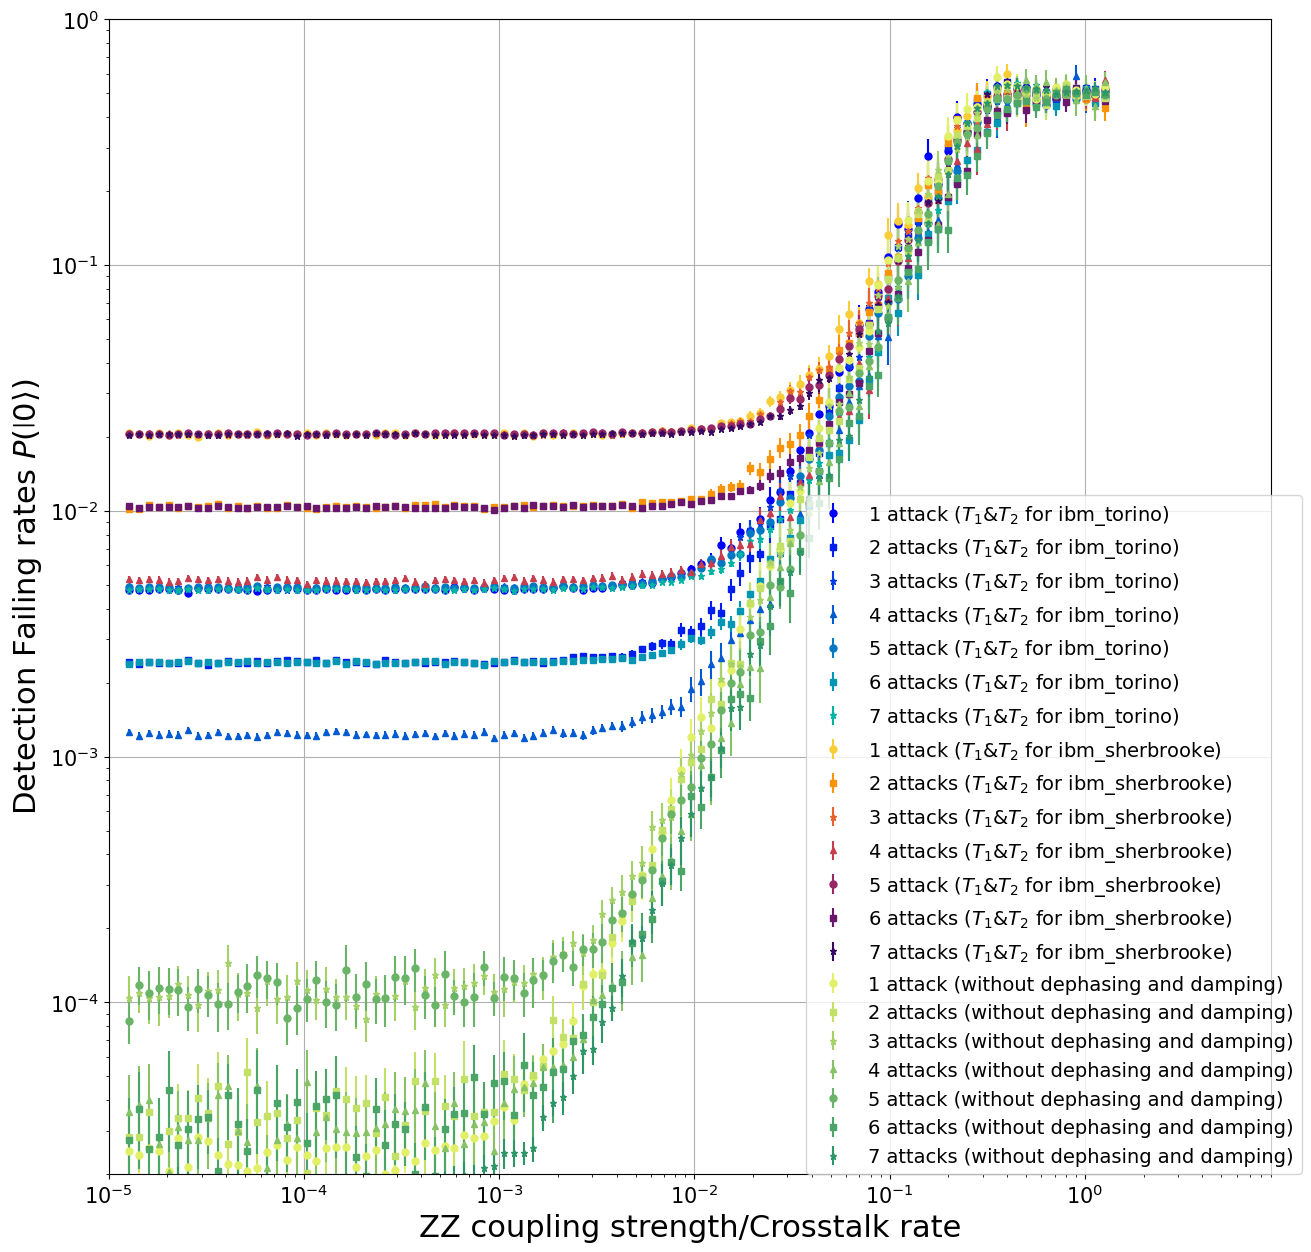

In [ ]:
#plt.style.use('classic')
fig, ax = plt.subplots(figsize = (15,15))
cmap = cm.winter
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(torino_detection_rates1), yerr=2*np.array(torino_detection_rates_err1), label=r'1 attack ($T_1&T_2$ for ibm_torino)', fmt='o', markersize=5, color=cmap(0))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(torino_detection_rates2), yerr=2*np.array(torino_detection_rates_err2), label=r'2 attacks ($T_1&T_2$ for ibm_torino)', fmt='s', markersize=5, color=cmap(30))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(torino_detection_rates3), yerr=2*np.array(torino_detection_rates_err3), label=r'3 attacks ($T_1&T_2$ for ibm_torino)', fmt='*', markersize=5, color=cmap(60))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(torino_detection_rates4), yerr=2*np.array(torino_detection_rates_err4), label=r'4 attacks ($T_1&T_2$ for ibm_torino)', fmt='^', markersize=5, color=cmap(90))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(torino_detection_rates5), yerr=2*np.array(torino_detection_rates_err5), label=r'5 attack ($T_1&T_2$ for ibm_torino)', fmt='o', markersize=5, color=cmap(120))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(torino_detection_rates6), yerr=2*np.array(torino_detection_rates_err6), label=r'6 attacks ($T_1&T_2$ for ibm_torino)', fmt='s', markersize=5, color=cmap(150))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(torino_detection_rates7), yerr=2*np.array(torino_detection_rates_err7), label=r'7 attacks ($T_1&T_2$ for ibm_torino)', fmt='*', markersize=5, color=cmap(180))

cmap = cm.inferno_r
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(sherbrooke_detection_rates1), yerr=2*np.array(sherbrooke_detection_rates_err1), label=r'1 attack ($T_1&T_2$ for ibm_sherbrooke)', fmt='o', markersize=5, color=cmap(30))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(sherbrooke_detection_rates2), yerr=2*np.array(sherbrooke_detection_rates_err2), label=r'2 attacks ($T_1&T_2$ for ibm_sherbrooke)', fmt='s', markersize=5, color=cmap(60))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(sherbrooke_detection_rates3), yerr=2*np.array(sherbrooke_detection_rates_err3), label=r'3 attacks ($T_1&T_2$ for ibm_sherbrooke)', fmt='*', markersize=5, color=cmap(90))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(sherbrooke_detection_rates4), yerr=2*np.array(sherbrooke_detection_rates_err4), label=r'4 attacks ($T_1&T_2$ for ibm_sherbrooke)', fmt='^', markersize=5, color=cmap(120))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(sherbrooke_detection_rates5), yerr=2*np.array(sherbrooke_detection_rates_err5), label=r'5 attack ($T_1&T_2$ for ibm_sherbrooke)', fmt='o', markersize=5, color=cmap(150))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(sherbrooke_detection_rates6), yerr=2*np.array(sherbrooke_detection_rates_err6), label=r'6 attacks ($T_1&T_2$ for ibm_sherbrooke)', fmt='s', markersize=5, color=cmap(180))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(sherbrooke_detection_rates7), yerr=2*np.array(sherbrooke_detection_rates_err7), label=r'7 attacks ($T_1&T_2$ for ibm_sherbrooke)', fmt='*', markersize=5, color=cmap(210))

cmap = cm.summer_r
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(detection_rates_pure1), yerr=2*np.array(detection_rates_pure_err1), label='1 attack (without dephasing and damping)', fmt='o', markersize=5, color=cmap(30))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(detection_rates_pure2), yerr=2*np.array(detection_rates_pure_err2), label='2 attacks (without dephasing and damping)', fmt='s', markersize=5, color=cmap(60))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(detection_rates_pure3), yerr=2*np.array(detection_rates_pure_err3), label='3 attacks (without dephasing and damping)', fmt='*', markersize=5, color=cmap(90))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(detection_rates_pure4), yerr=2*np.array(detection_rates_pure_err4), label='4 attacks (without dephasing and damping)', fmt='^', markersize=5, color=cmap(120))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(detection_rates_pure5), yerr=2*np.array(detection_rates_pure_err5), label='5 attack (without dephasing and damping)', fmt='o', markersize=5, color=cmap(150))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(detection_rates_pure6), yerr=2*np.array(detection_rates_pure_err6), label='6 attacks (without dephasing and damping)', fmt='s', markersize=5, color=cmap(180))
ax.errorbar(ZZ_rates/(pi/4), 1-np.array(detection_rates_pure7), yerr=2*np.array(detection_rates_pure_err7), label='7 attacks (without dephasing and damping)', fmt='*', markersize=5, color=cmap(210))

#fitted_params_2,_ = opt.curve_fit(logit_fit, ZZ_rates[:90]/(pi/2), false_alarm_rate_2[:90], maxfev=10000)
#fitted_params_3,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/3), false_alarm_rate_3, maxfev=10000)
#fitted_params_4,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/4), false_alarm_rate_4, maxfev=10000)
#fitted_params_5,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/5), false_alarm_rate_5, maxfev=10000)
#
##print(fitted_params_2)
#ax[0].plot(ZZ_rates/(pi/2), logit_fit(ZZ_rates/(pi/2), *fitted_params_2))

#ax.annotate(r'$T_{1}&T_{2}$ for $ibm\_sherbrooke$', (0.002,0.008),size=18)
#ax.annotate(r'$ibm\_torino$', (0.005,0.008),size=18)
ax.legend(loc=(0.6,0),fontsize=14)
ax.grid()
#a].set_xticks(list(range(1,grover_iterations+1)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-5,0.9e1)
ax.set_ylim([0.00002,1])
ax.tick_params(axis='both', which='major', labelsize=15)
#a].set_title('With Dephasing and Amplitude Damping', fontsize=15)
ax.set_xlabel(r'ZZ coupling strength/Crosstalk rate',fontsize=22)
ax.set_ylabel(r"Detection Failing rates $P(\left|0\right>)$",fontsize=22)
fig.savefig('detection_rates_dd/false detection rates.pdf', dpi=300, bbox_inches="tight")

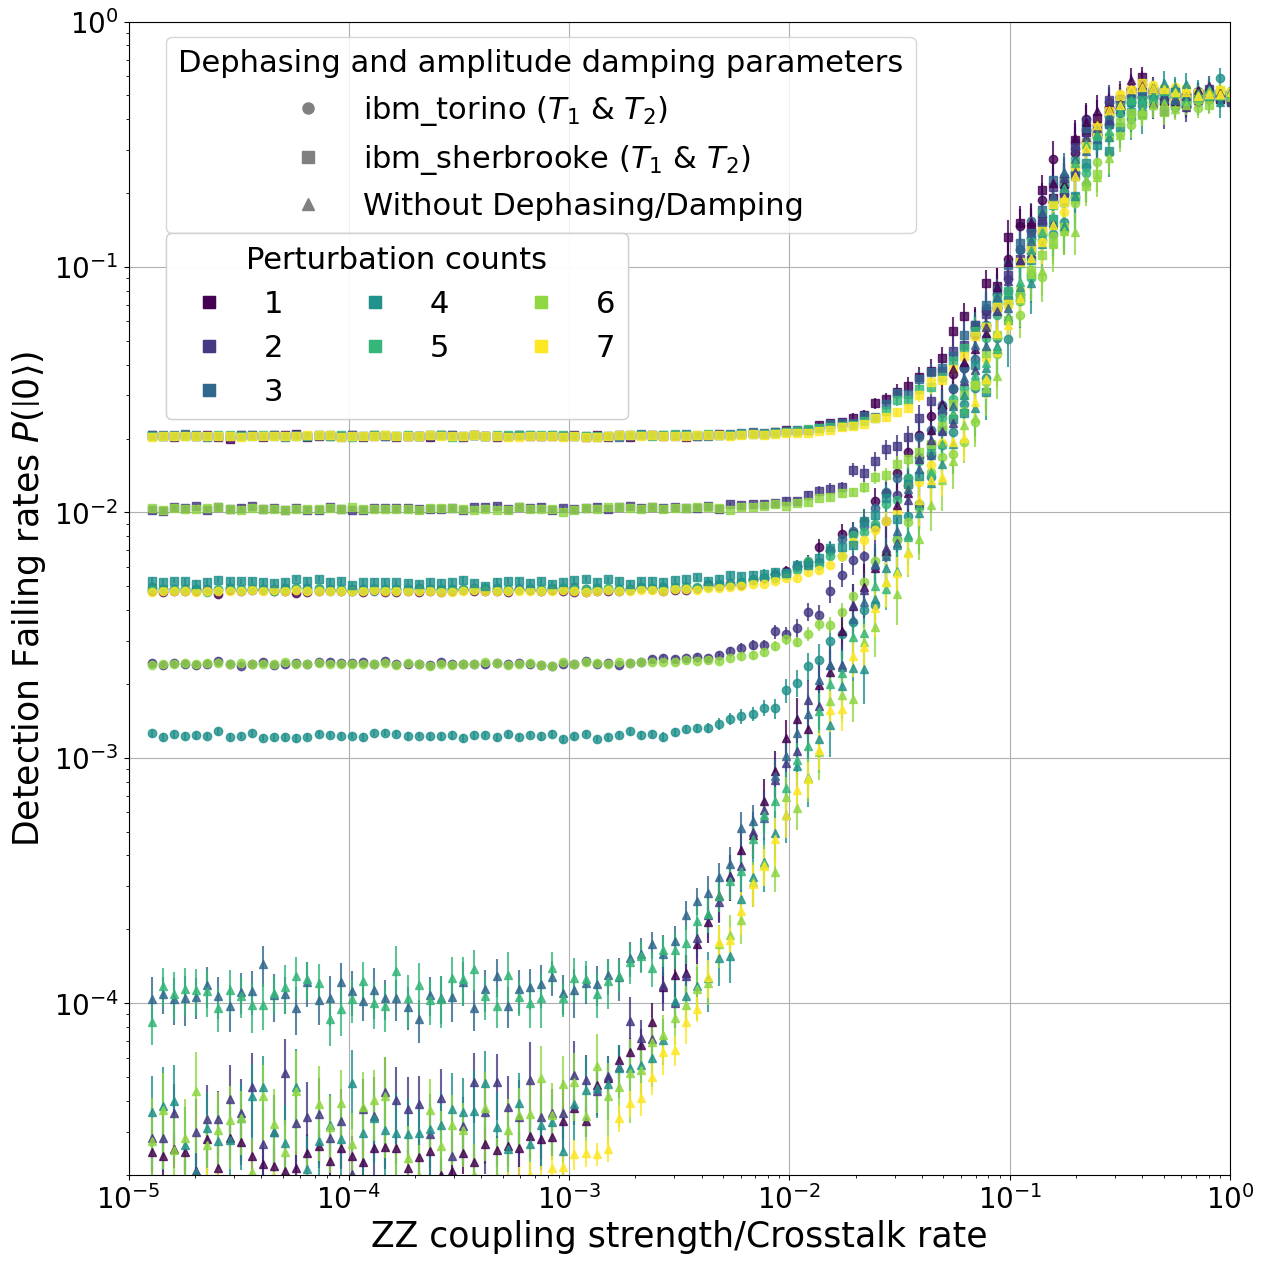

In [6]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(13, 13))

# 定义颜色映射和标准化
cmap = plt.cm.viridis  # 统一颜色映射
norm = plt.Normalize(vmin=1, vmax=7)  # 攻击次数范围1-7

# 定义数据集配置
datasets = [
    {
        'label': 'ibm_torino ($T_1$ & $T_2$)',
        'rates': [1-np.array(torino_detection_rates1), 1-np.array(torino_detection_rates2), 
                 1-np.array(torino_detection_rates3), 1-np.array(torino_detection_rates4),
                 1-np.array(torino_detection_rates5), 1-np.array(torino_detection_rates6),
                 1-np.array(torino_detection_rates7)],
        'errs': [torino_detection_rates_err1, torino_detection_rates_err2,
                torino_detection_rates_err3, torino_detection_rates_err4,
                torino_detection_rates_err5, torino_detection_rates_err6,
                torino_detection_rates_err7],
        'marker': 'o'
    },
    {
        'label': 'ibm_sherbrooke ($T_1$ & $T_2$)',
        'rates': [1-np.array(sherbrooke_detection_rates1), 1-np.array(sherbrooke_detection_rates2),
                1-np.array(sherbrooke_detection_rates3), 1-np.array(sherbrooke_detection_rates4),
                1-np.array(sherbrooke_detection_rates5), 1-np.array(sherbrooke_detection_rates6),
                1-np.array(sherbrooke_detection_rates7)],
        'errs': [sherbrooke_detection_rates_err1, sherbrooke_detection_rates_err2,
                sherbrooke_detection_rates_err3, sherbrooke_detection_rates_err4,
                sherbrooke_detection_rates_err5, sherbrooke_detection_rates_err6,
                sherbrooke_detection_rates_err7],
        'marker': 's'
    },
    {
        'label': 'Without Dephasing/Damping',
        'rates': [1-np.array(detection_rates_pure1), 1-np.array(detection_rates_pure2),
                1-np.array(detection_rates_pure3), 1-np.array(detection_rates_pure4),
                1-np.array(detection_rates_pure5), 1-np.array(detection_rates_pure6),
                1-np.array(detection_rates_pure7)],
        'errs': [detection_rates_pure_err1, detection_rates_pure_err2,
                detection_rates_pure_err3, detection_rates_pure_err4,
                detection_rates_pure_err5, detection_rates_pure_err6,
                detection_rates_pure_err7],
        'marker': '^'
    }
]

# 绘制数据点
for ds in datasets:
    for attack_num in range(7):
        color = cmap(norm(attack_num + 1))
        ax.errorbar(
            ZZ_rates/(np.pi/4),
            ds['rates'][attack_num],
            yerr=2*np.array(ds['errs'][attack_num]),
            fmt=ds['marker'],
            markersize=6,
            color=color,
            alpha=0.8,
            label='_nolegend_'
        )

# 创建图例元素
legend_elements = [
    # 数据集图例（标记样式）
    plt.Line2D([0], [0], marker=ds['marker'], color='gray', 
              markersize=8, linestyle='', label=ds['label']) 
    for ds in datasets
] + [
    # 攻击次数图例（颜色渐变）
    plt.Line2D([0], [0], marker='s', color=cmap(norm(i)), 
              markersize=8, linestyle='', label=f'{i}') if i != 1 
    else plt.Line2D([0], [0], marker='s', color=cmap(norm(i)), 
              markersize=8, linestyle='', label=f'{i}')
    for i in range(1,8)
]

# 分列显示图例
legend1 = ax.legend(handles=legend_elements[:3],  # 前3个是数据集
                  loc='upper left',
                  bbox_to_anchor=(0.02, 1),
                  frameon=True,
                  fontsize=22,
                  title='Dephasing and amplitude damping parameters',
                  title_fontsize=22)

legend2 = ax.legend(handles=legend_elements[3:],  # 后7个是攻击次数
                  loc='upper left',
                  bbox_to_anchor=(0.02, 0.83),
                  ncol=3,
                  frameon=True,
                  fontsize=22,
                  title='Perturbation counts',
                  title_fontsize=22)

# 添加回图例对象
ax.add_artist(legend1)
ax.add_artist(legend2)

# 格式设置
ax.grid(True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-5, 1e0)
ax.set_ylim([0.00002, 1])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'ZZ coupling strength/Crosstalk rate', fontsize=25)
ax.set_ylabel(r"Detection Failing rates $P(\left|0\right>)$", fontsize=25)

# 调整布局
plt.tight_layout(pad=2.0)
fig.savefig('detection_rates_dd/false detection rates merged.pdf', dpi=300, bbox_inches="tight")
plt.show()

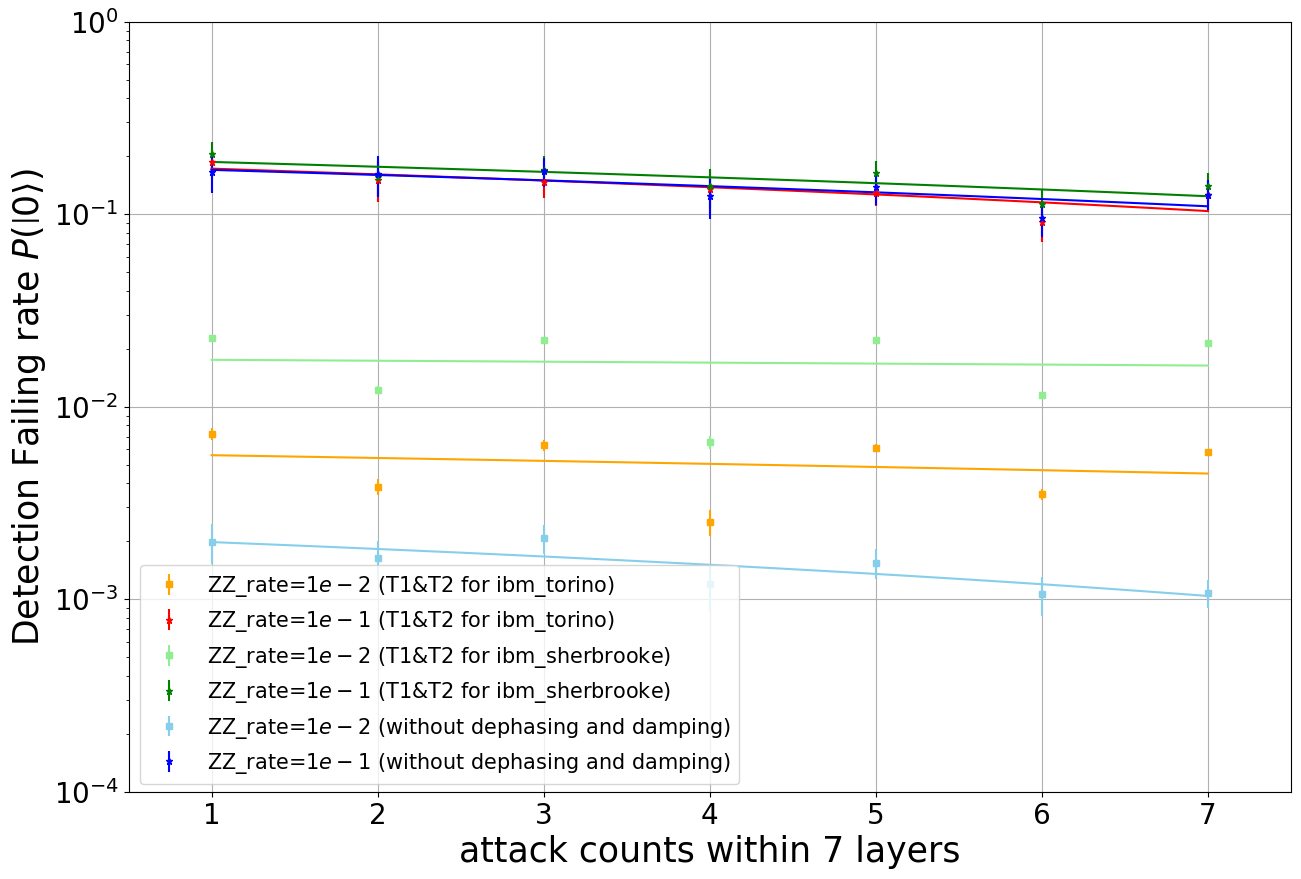

In [9]:
#plt.style.use('classic')
fig, ax = plt.subplots(figsize = (15,10))
num_q_range = [1,2,3,4,5,6,7]

torino_rates_e_3 = [torino_detection_rates[q][40] for q in num_q_range]
torino_rates_e_2 = [torino_detection_rates[q][60] for q in num_q_range]
torino_rates_e_1 = [torino_detection_rates[q][80] for q in num_q_range]
torino_rates_e_3_err = [torino_detection_rates_err[q][40] for q in num_q_range]
torino_rates_e_2_err = [torino_detection_rates_err[q][60] for q in num_q_range]
torino_rates_e_1_err = [torino_detection_rates_err[q][80] for q in num_q_range]

sherbrooke_rates_e_3 = [sherbrooke_detection_rates[q][40] for q in num_q_range]
sherbrooke_rates_e_2 = [sherbrooke_detection_rates[q][60] for q in num_q_range]
sherbrooke_rates_e_1 = [sherbrooke_detection_rates[q][80] for q in num_q_range]
sherbrooke_rates_e_3_err = [sherbrooke_detection_rates_err[q][40] for q in num_q_range]
sherbrooke_rates_e_2_err = [sherbrooke_detection_rates_err[q][60] for q in num_q_range]
sherbrooke_rates_e_1_err = [sherbrooke_detection_rates_err[q][80] for q in num_q_range]
#
rates_pure_e_3 = [pure_detection_rates[q][40] for q in num_q_range]
rates_pure_e_2 = [pure_detection_rates[q][60] for q in num_q_range]
rates_pure_e_1 = [pure_detection_rates[q][80] for q in num_q_range]
rates_pure_e_3_err = [pure_detection_rates_err[q][40] for q in num_q_range]
rates_pure_e_2_err = [pure_detection_rates_err[q][60] for q in num_q_range]
rates_pure_e_1_err = [pure_detection_rates_err[q][80] for q in num_q_range]

#with dephasing and damping (torino)
#ax.errorbar(num_q_range, torino_rates_e_3, yerr=2*np.array(torino_rates_e_3_err), label=r'ZZ_rate=$1e-3$ (T1&T2 for ibm_torino)', fmt='o', markersize=5, color='orange')
ax.errorbar(num_q_range, 1-np.array(torino_rates_e_2), yerr=2*np.array(torino_rates_e_2_err), label=r'ZZ_rate=$1e-2$ (T1&T2 for ibm_torino)', fmt='s', markersize=5, color='orange')
ax.errorbar(num_q_range, 1-np.array(torino_rates_e_1), yerr=2*np.array(torino_rates_e_1_err), label=r'ZZ_rate=$1e-1$ (T1&T2 for ibm_torino)', fmt='*', markersize=5, color='red')
#with dephasing and damping(sherbrooke)
#ax.errorbar(num_q_range, 1-np.array(sherbrooke_rates_e_3), yerr=2*np.array(sherbrooke_rates_e_3_err), label=r'ZZ_rate=$1e-3$ (T1&T2 for ibm_sherbrooke)', fmt='o', markersize=5, color='orange')
ax.errorbar(num_q_range, 1-np.array(sherbrooke_rates_e_2), yerr=2*np.array(sherbrooke_rates_e_2_err), label=r'ZZ_rate=$1e-2$ (T1&T2 for ibm_sherbrooke)', fmt='s', markersize=5, color='lightgreen')
ax.errorbar(num_q_range, 1-np.array(sherbrooke_rates_e_1), yerr=2*np.array(sherbrooke_rates_e_1_err), label=r'ZZ_rate=$1e-1$ (T1&T2 for ibm_sherbrooke)', fmt='*', markersize=5, color='green')
##without dephasing and damping
##ax.errorbar(num_q_range,1-np.array(rates_pure_e_3), yerr=2*np.array(rates_pure_e_3_err), label=r'ZZ_rate=$1e-3$ (without dephasing and damping)', fmt='o', markersize=5, color='skyblue')
ax.errorbar(num_q_range, 1-np.array(rates_pure_e_2), yerr=2*np.array(rates_pure_e_2_err), label=r'ZZ_rate=$1e-2$ (without dephasing and damping)', fmt='s', markersize=5, color='skyblue')
ax.errorbar(num_q_range, 1-np.array(rates_pure_e_1), yerr=2*np.array(rates_pure_e_1_err), label=r'ZZ_rate=$1e-1$ (without dephasing and damping)', fmt='*', markersize=5, color='blue')


fitted_params_torino_e_2,_ = opt.curve_fit(lin_fit, num_q_range, 1-np.array(torino_rates_e_2))
fitted_params_torino_e_1,_ = opt.curve_fit(lin_fit, num_q_range, 1-np.array(torino_rates_e_1))
fitted_params_sherbrooke_e_2,_ = opt.curve_fit(lin_fit, num_q_range, 1-np.array(sherbrooke_rates_e_2))
fitted_params_sherbrooke_e_1,_ = opt.curve_fit(lin_fit, num_q_range, 1-np.array(sherbrooke_rates_e_1))
fitted_params_pure_e_2,_ = opt.curve_fit(lin_fit, num_q_range, 1-np.array(rates_pure_e_2))
fitted_params_pure_e_1,_ = opt.curve_fit(lin_fit, num_q_range, 1-np.array(rates_pure_e_1))

inputs_for_fits = np.linspace(1,7,100)
ax.plot(inputs_for_fits, lin_fit(inputs_for_fits, *fitted_params_torino_e_2), color='orange')
ax.plot(inputs_for_fits, lin_fit(inputs_for_fits, *fitted_params_torino_e_1), color='red')
ax.plot(inputs_for_fits, lin_fit(inputs_for_fits, *fitted_params_sherbrooke_e_2), color='lightgreen')
ax.plot(inputs_for_fits, lin_fit(inputs_for_fits, *fitted_params_sherbrooke_e_1), color='green')
ax.plot(inputs_for_fits, lin_fit(inputs_for_fits, *fitted_params_pure_e_2), color='skyblue')
ax.plot(inputs_for_fits, lin_fit(inputs_for_fits, *fitted_params_pure_e_1), color='blue')
#fitted_params_3,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/3), false_alarm_rate_3, maxfev=10000)
#fitted_params_4,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/4), false_alarm_rate_4, maxfev=10000)
#fitted_params_5,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/5), false_alarm_rate_5, maxfev=10000)
#
##print(fitted_params_2)
#ax[0].plot(ZZ_rates/(pi/2), logit_fit(ZZ_rates/(pi/2), *fitted_params_2))
ax.legend(loc=(0.01,0.01),fontsize=15)
ax.grid()
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.5,7.5)
ax.set_xticks(list(range(1,8)))
ax.set_ylim([0.0001,1])
#ax.set_ylim([0.00001,0.03])
#a].set_title('With Dephasing and Amplitude Damping', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'attack counts within 7 layers',fontsize=25)
ax.set_ylabel(r"Detection Failing rate $P(\left|0\right>)$",fontsize=25)
fig.savefig('detection_rates_dd/false detection rates vs attack counts.pdf', dpi=300, bbox_inches="tight")

In [4]:
#retrieve data
with open(f"./detection_rates_dd/pure_detection_rates_pi8.pkl", "rb") as f:
    torino_detection_rates = pickle.load(f)
with open(f"./detection_rates_dd/pure_detection_rates_pi8_err.pkl", "rb") as f:
    torino_detection_rates_err = pickle.load(f)
    
#print(torino_detection_rates)
#with open(f"./detection_rates/sherbrooke_detection_rates.pkl", "rb") as f:
#    sherbrooke_detection_rates = pickle.load(f)
#with open(f"./detection_rates/sherbrooke_detection_rates_err.pkl", "rb") as f:
#    sherbrooke_detection_rates_err = pickle.load(f)
#    
#with open(f"./detection_rates/pure_detection_rates.pkl", "rb") as f:
#    detection_rates_pure = pickle.load(f)
#with open(f"./detection_rates/pure_detection_rates_err.pkl", "rb") as f:
#    detection_rates_pure_err = pickle.load(f)

In [ ]:
#attacks = 7
for attacks in range(1,8):
    #plt.style.use('classic')
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,12))

    ZZ_rates = np.logspace(-3,0,20,base=10)/2
    two_q_crosstalk_angles = np.logspace(-3,0,20,base=10)/2
    ZZ_rates, two_q_crosstalk_angles = np.meshgrid(np.log10(ZZ_rates/(pi/8)), np.log10(two_q_crosstalk_angles/(pi/8)))

    #print(ZZ_rates)
    #print(two_q_crosstalk_angles)
    #print(1-torino_detection_rates4)
    ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[attacks]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='2 attacks (T1&T2 for ibm_torino)', vmin=-4, vmax=0)


    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[1]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='1 attacks (T1&T2 for ibm_torino)', vmin=-3, vmax=0)
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[2]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='2 attacks (T1&T2 for ibm_torino)', vmin=-3, vmax=0)
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[3]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='3 attacks (T1&T2 for ibm_torino)', vmin=-3, vmax=0)
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[4]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='4 attacks (T1&T2 for ibm_torino)', vmin=-3, vmax=0)
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[5]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='5 attacks (T1&T2 for ibm_torino)', vmin=-3, vmax=0)
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[6]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='6 attacks (T1&T2 for ibm_torino)', vmin=-3, vmax=0)
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[7]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='7 attacks (T1&T2 for ibm_torino)', vmin=-3, vmax=0)

    #cmap = cm.inferno_r
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[1]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='1 attacks (T1&T2 for ibm_sherbrooke)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[2]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='2 attacks (T1&T2 for ibm_sherbrooke)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[3]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='3 attacks (T1&T2 for ibm_sherbrooke)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[4]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='4 attacks (T1&T2 for ibm_sherbrooke)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[5]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='5 attacks (T1&T2 for ibm_sherbrooke)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[6]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='6 attacks (T1&T2 for ibm_sherbrooke)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[7]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='7 attacks (T1&T2 for ibm_sherbrooke)')

    #cmap = cm.summer_r
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[1]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='1 attacks (without dephasing and damping)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[2]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='2 attacks (without dephasing and damping)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[3]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='3 attacks (without dephasing and damping)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[4]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='4 attacks (without dephasing and damping)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[5]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='5 attacks (without dephasing and damping)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[6]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='6 attacks (without dephasing and damping)')
    #ax.plot_surface(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[7]), cmap = cm.coolwarm, linewidth=0, antialiased=True, label='7 attacks (without dephasing and damping)')


    for i in range(len(ZZ_rates)):
        for j in range(len(ZZ_rates[i])):
            ax.plot((ZZ_rates[i][j], ZZ_rates[i][j]), 
                    (two_q_crosstalk_angles[i][j], two_q_crosstalk_angles[i][j]), 
                    (np.log10(1-torino_detection_rates[attacks][i][j]-torino_detection_rates_err[attacks][i][j]), np.log10(1-torino_detection_rates[attacks][i][j])),
                    c='k',
                    zorder=1
                    )
    for i in range(len(ZZ_rates)):
        for j in range(len(ZZ_rates[i])):
            ax.plot((ZZ_rates[i][j], ZZ_rates[i][j]), 
                    (two_q_crosstalk_angles[i][j], two_q_crosstalk_angles[i][j]), 
                    (np.log10(1-torino_detection_rates[attacks][i][j]), np.log10(1-torino_detection_rates[attacks][i][j]+torino_detection_rates_err[attacks][i][j])),
                    c='k',
                    zorder=3
                    )



    #ax.set_xlim(5e-6,2e0)
    #ax.set_ylim([0.0001,1])

    ax.set_xticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=14)
    ax.set_yticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=14)
    ax.set_zticks([-4,-3,-2,-1,0],[r'$10^{-4}$',r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=13)
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.set_zscale('log')
    #a].set_title('With Dephasing and Amplitude Damping', fontsize=15)
    ax.set_zlim(-4,0)
    ax.set_xlabel(r'$\alpha$/$\theta$',fontsize=23)
    ax.set_ylabel(r'$\phi$/$\theta$',fontsize=23)
    ax.set_zlabel(r"False negative rate $P(\left|0\right>)$",fontsize=18)
    ax.set_position(pos=[0,0,1,1])
    #ax.view_init(elev=0, azim=180)
    fig.savefig(f'detection_rates_dd/pure {attacks} attacks Xtalk pi8 8q surfaceplot.pdf', dpi=300, bbox_inches="tight")

Detection rates (with two-qubit coherent noise in crosstalk) test

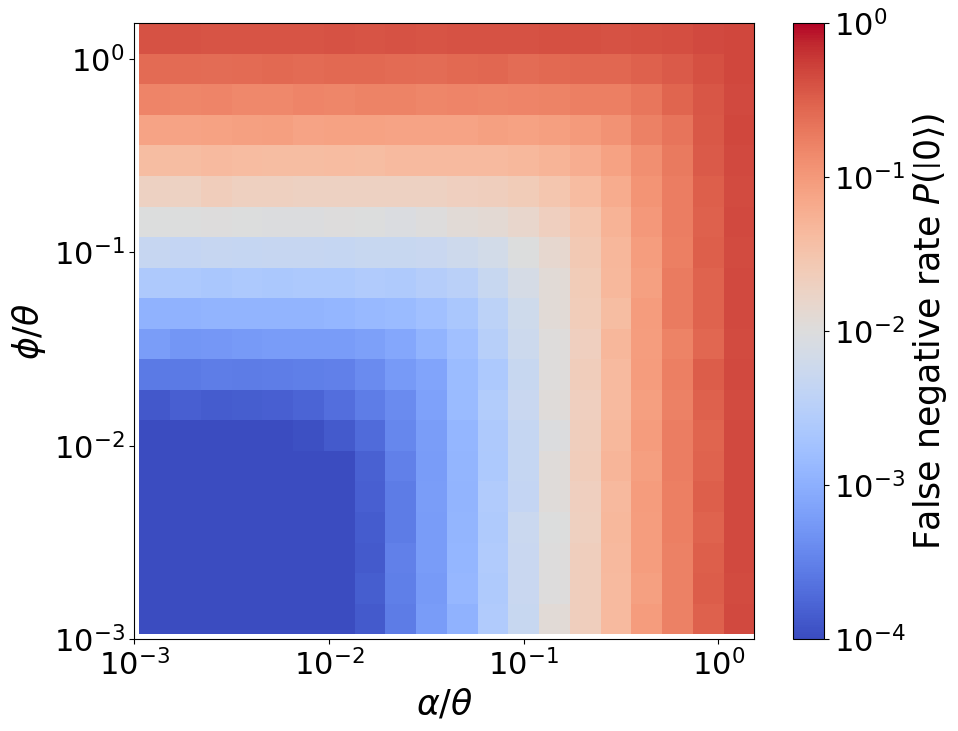

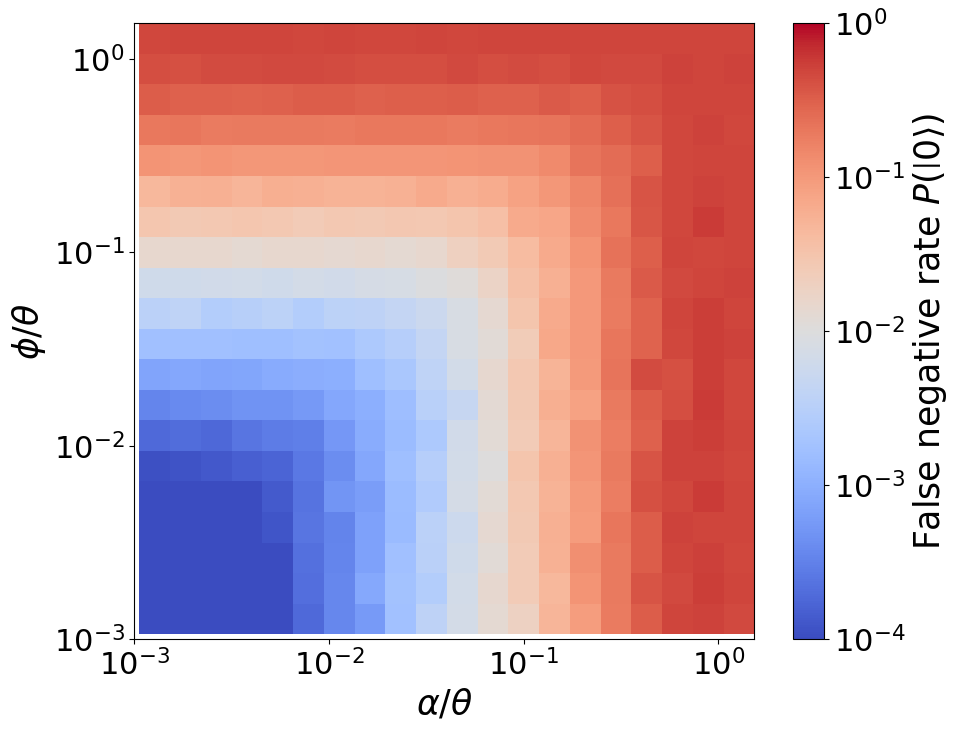

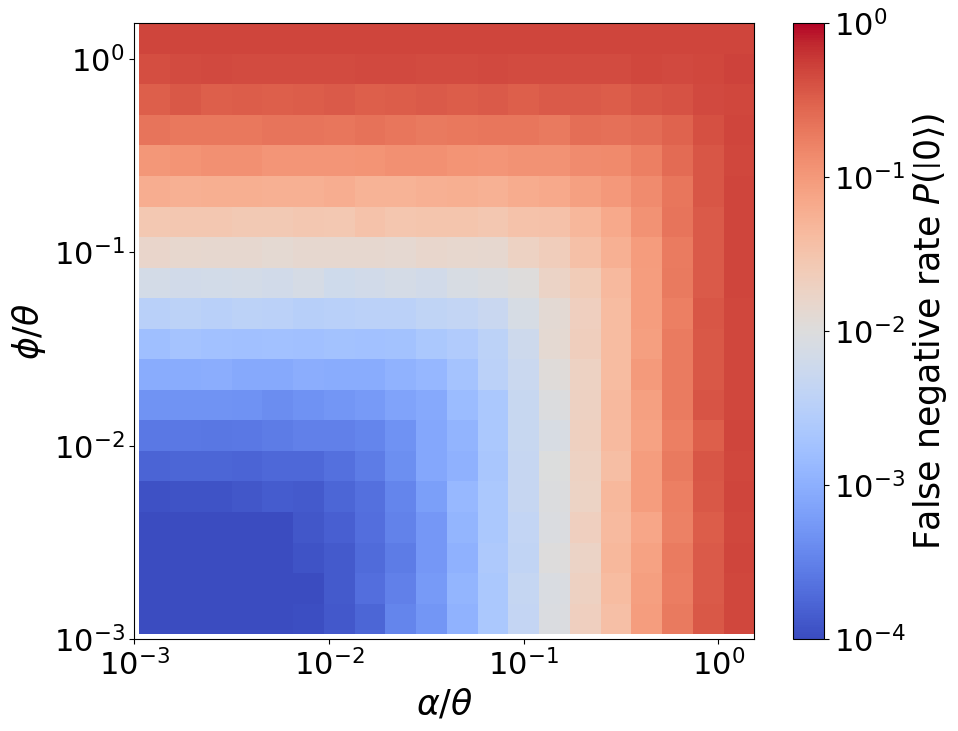

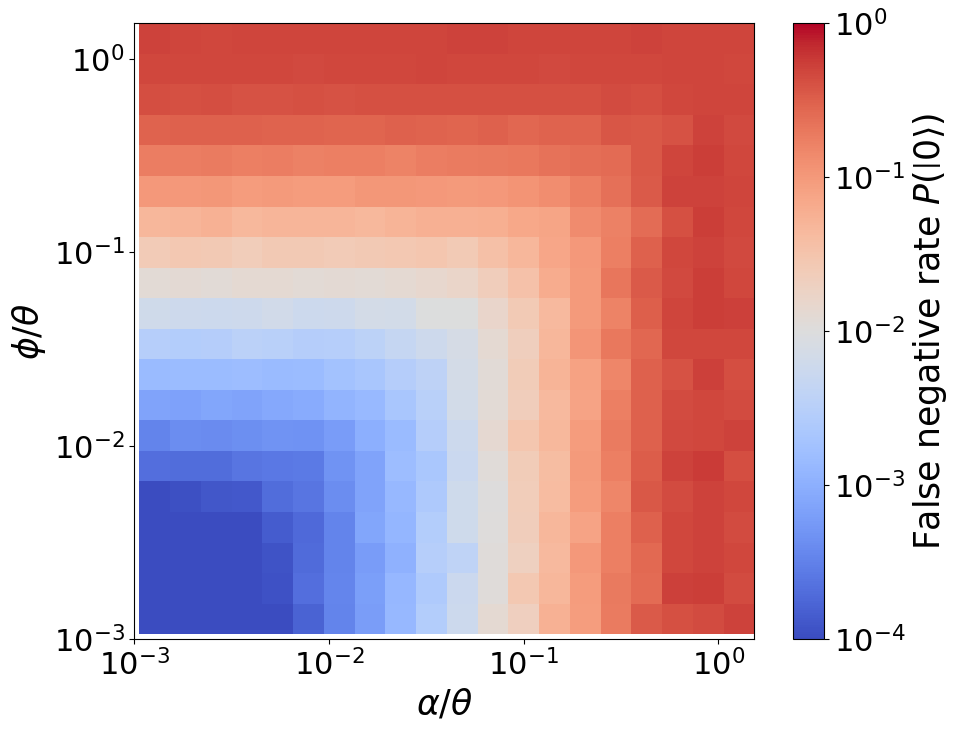

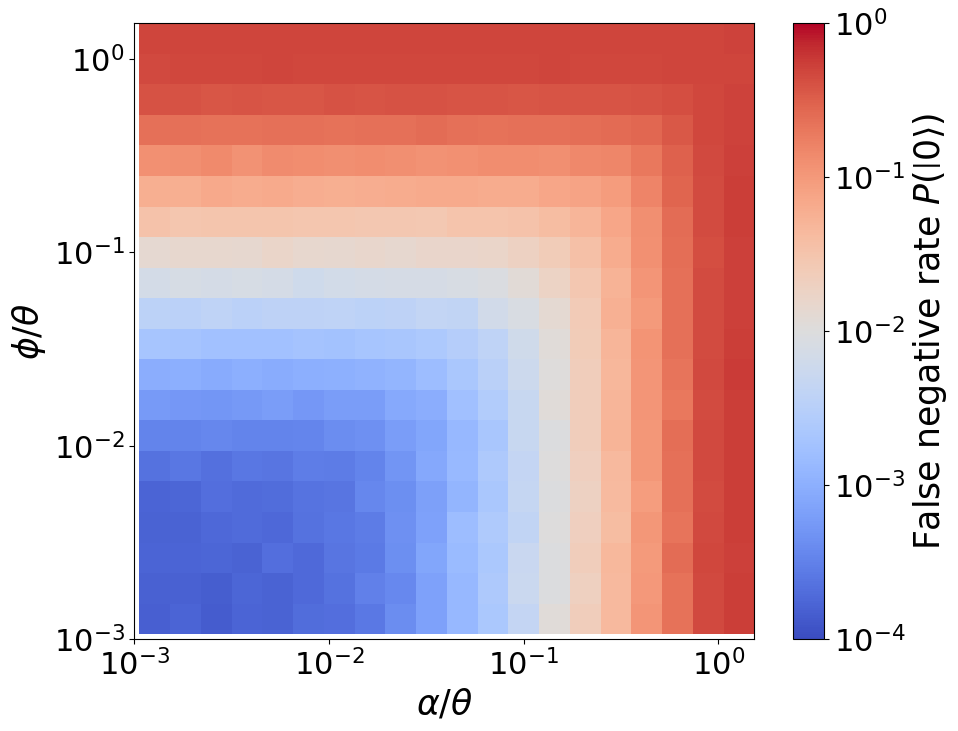

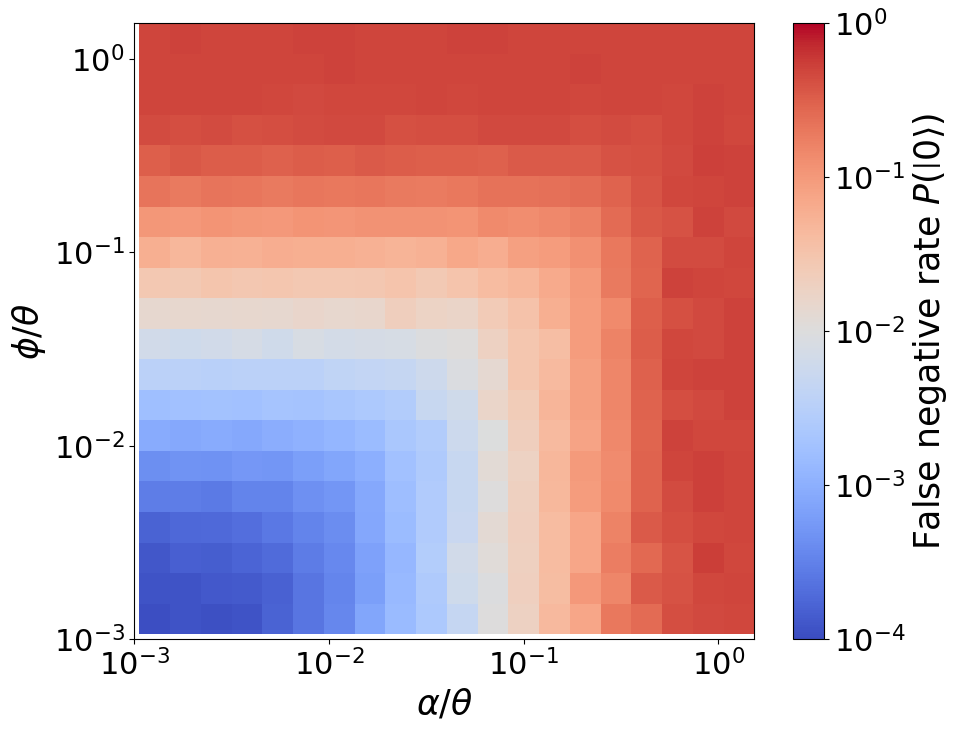

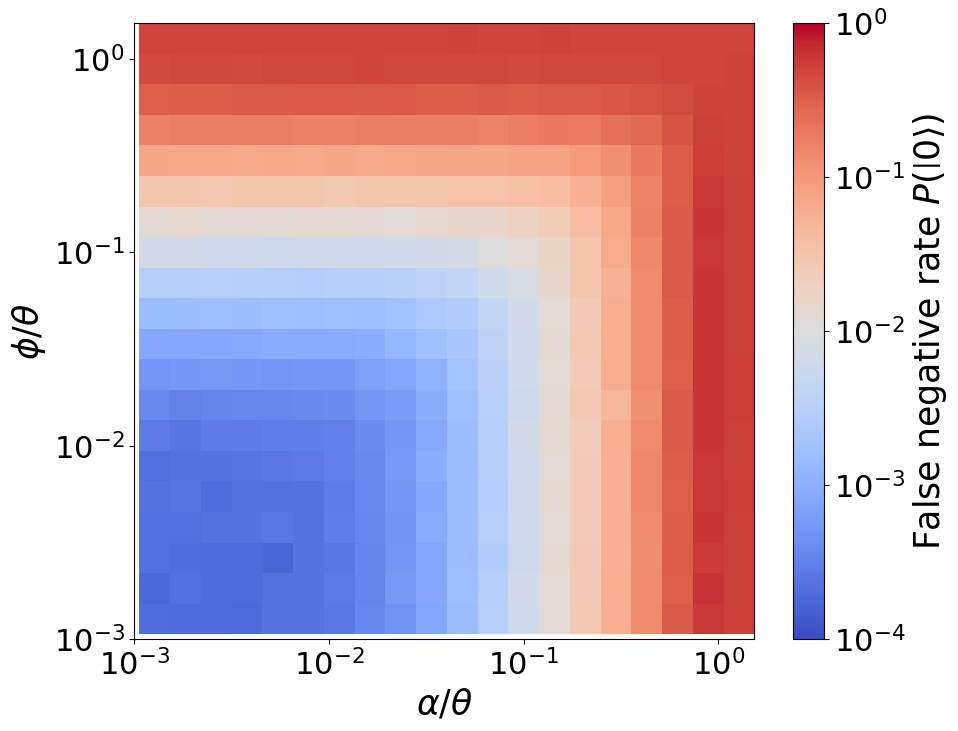

In [18]:
for attacks in range(1,8):
    #plt.style.use('classic')
    fig, ax = plt.subplots(figsize=(10,8))
    ZZ_rates = np.logspace(-3,0,20,base=10)/2
    two_q_crosstalk_angles = np.logspace(-3,0,20,base=10)/2
    ZZ_rates, two_q_crosstalk_angles = np.meshgrid(np.log10(ZZ_rates/(pi/8)), np.log10(two_q_crosstalk_angles/(pi/8)))

    #ZZ_rates_log = horizontal_mesh_centres_to_corners(ZZ_rates_log)
    #two_q_crosstalk_angles_log = vertical_mesh_centres_to_corners(two_q_crosstalk_angles_log)
    #print(ZZ_rates)
    #print(two_q_crosstalk_angles)
    #print(1-torino_detection_rates4)

    #attacks = 7
    plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[attacks]), cmap = cm.coolwarm, shading='nearest', label=r'2 attacks ($T_1&T_2$ for ibm_torino)', vmin=-4, vmax=0)


    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[1]), cmap = cm.coolwarm, shading='nearest', label=r'1 attacks ($T_1&T_2$ for ibm_torino)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[2]), cmap = cm.coolwarm, shading='nearest', label=r'2 attacks ($T_1&T_2$ for ibm_torino)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[3]), cmap = cm.coolwarm, shading='nearest', label=r'3 attacks ($T_1&T_2$ for ibm_torino)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[4]), cmap = cm.coolwarm, shading='nearest', label=r'4 attacks ($T_1&T_2$ for ibm_torino)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[5]), cmap = cm.coolwarm, shading='nearest', label=r'5 attacks ($T_1&T_2$ for ibm_torino)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[6]), cmap = cm.coolwarm, shading='nearest', label=r'6 attacks ($T_1&T_2$ for ibm_torino)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[7]), cmap = cm.coolwarm, shading='nearest', label=r'7 attacks ($T_1&T_2$ for ibm_torino)', vmin=-3, vmax=0)

    #cmap = cm.inferno_r
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[1]), cmap = cm.coolwarm, shading='nearest', label=r'1 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[2]), cmap = cm.coolwarm, shading='nearest', label=r'2 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[3]), cmap = cm.coolwarm, shading='nearest', label=r'3 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[4]), cmap = cm.coolwarm, shading='nearest', label=r'4 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[5]), cmap = cm.coolwarm, shading='nearest', label=r'5 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[6]), cmap = cm.coolwarm, shading='nearest', label=r'6 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[7]), cmap = cm.coolwarm, shading='nearest', label=r'7 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)

    #cmap = cm.summer_r
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[1]), cmap = cm.coolwarm, shading='nearest', label='1 attacks (without dephasing and damping)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[2]), cmap = cm.coolwarm, shading='nearest', label='2 attacks (without dephasing and damping)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[3]), cmap = cm.coolwarm, shading='nearest', label='3 attacks (without dephasing and damping)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[4]), cmap = cm.coolwarm, shading='nearest', label='4 attacks (without dephasing and damping)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[5]), cmap = cm.coolwarm, shading='nearest', label='5 attacks (without dephasing and damping)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[6]), cmap = cm.coolwarm, shading='nearest', label='6 attacks (without dephasing and damping)', vmin=-3, vmax=0)
    #plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[7]), cmap = cm.coolwarm, shading='nearest', label='7 attacks (without dephasing and damping)', vmin=-3, vmax=0)

    #ax.set_xlim(5e-6,2e0)
    #ax.set_ylim([0.0001,1])
    #ax.set_zlim(1e-5,0.1e1)

    colorbar = plt.colorbar(plot, aspect=20)
    colorbar.set_label(r'False negative rate $P(\left|0\right>)$', fontsize=25)
    colorbar.set_ticks(ticks=[-4,-3,-2,-1,0],labels=[r'$10^{-4}$',r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=22)

    ax.set_xticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=22)
    ax.set_yticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=22)
    #ax.set_zticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'])
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.set_zscale('log')
    #a].set_title('With Dephasing and Amplitude Damping', fontsize=15)
    ax.set_xlabel(r'$\alpha/\theta$',fontsize=25)
    ax.set_ylabel(r'$\phi/\theta$',fontsize=25)
    #ax.set_title(r'1 attack ($T_1&T_2$ from ibm_sherbrooke)',fontsize=14)
    #ax.set_title(r'1 attack (without dephasing and amplitude damping)',fontsize=14)

    fig.savefig(f'detection_rates_dd/pure {attacks} attacks Xtalk pi8 8q colorplot.pdf', dpi=300, bbox_inches="tight")

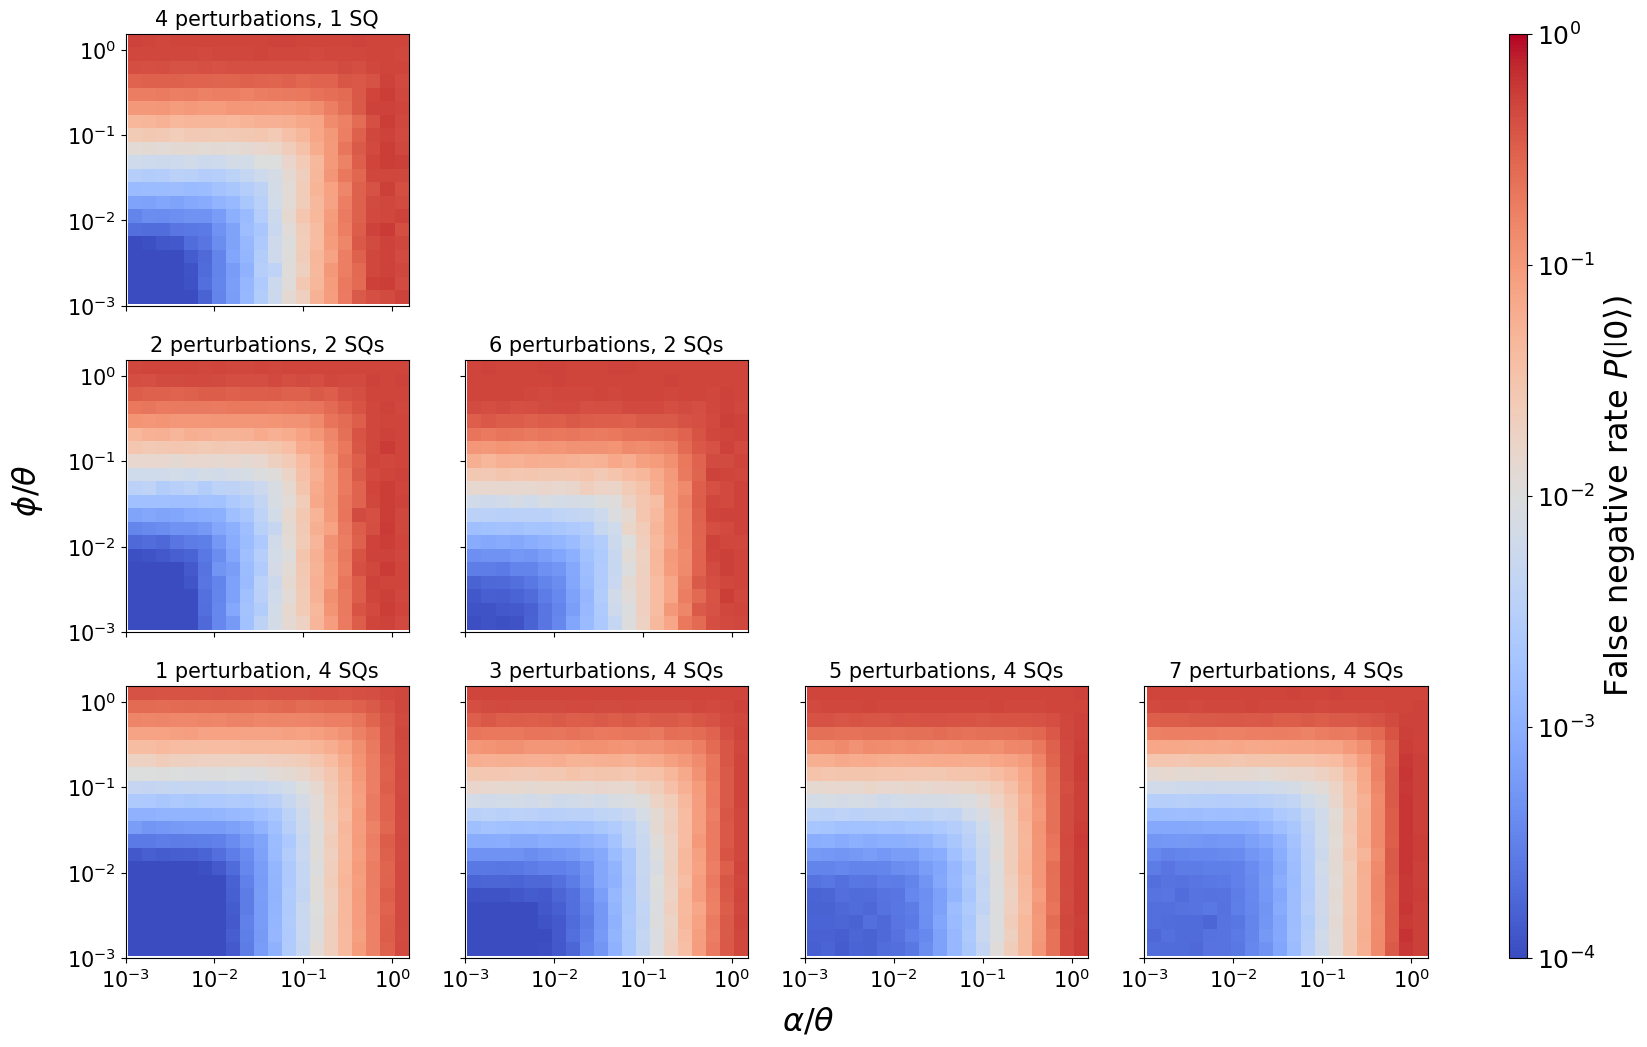

In [112]:
#plt.style.use('classic')
fig, axes = plt.subplots(3,4, figsize=(21,12), sharex=True, sharey=True)

fig.delaxes(axes[0,1])
fig.delaxes(axes[0,2])
fig.delaxes(axes[0,3])
fig.delaxes(axes[1,2])
fig.delaxes(axes[1,3])
ZZ_rates = np.logspace(-3,0,20,base=10)/2
two_q_crosstalk_angles = np.logspace(-3,0,20,base=10)/2
ZZ_rates, two_q_crosstalk_angles = np.meshgrid(np.log10(ZZ_rates/(pi/8)), np.log10(two_q_crosstalk_angles/(pi/8)))

#ZZ_rates_log = horizontal_mesh_centres_to_corners(ZZ_rates_log)
#two_q_crosstalk_angles_log = vertical_mesh_centres_to_corners(two_q_crosstalk_angles_log)
#print(ZZ_rates)
#print(two_q_crosstalk_angles)
#print(1-torino_detection_rates4)
plot1 = axes[2,0].pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[1]), cmap = cm.coolwarm, shading='nearest', label=r'1 attacks ($T_1&T_2$ for ibm_torino)', vmin=-4, vmax=0)
plot2 = axes[1,0].pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[2]), cmap = cm.coolwarm, shading='nearest', label=r'2 attacks ($T_1&T_2$ for ibm_torino)', vmin=-4, vmax=0)
plot3 = axes[2,1].pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[3]), cmap = cm.coolwarm, shading='nearest', label=r'3 attacks ($T_1&T_2$ for ibm_torino)', vmin=-4, vmax=0)
plot4 = axes[0,0].pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[4]), cmap = cm.coolwarm, shading='nearest', label=r'4 attacks ($T_1&T_2$ for ibm_torino)', vmin=-4, vmax=0)
plot5 = axes[2,2].pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[5]), cmap = cm.coolwarm, shading='nearest', label=r'5 attacks ($T_1&T_2$ for ibm_torino)', vmin=-4, vmax=0)
plot6 = axes[1,1].pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[6]), cmap = cm.coolwarm, shading='nearest', label=r'6 attacks ($T_1&T_2$ for ibm_torino)', vmin=-4, vmax=0)
plot7 = axes[2,3].pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-torino_detection_rates[7]), cmap = cm.coolwarm, shading='nearest', label=r'7 attacks ($T_1&T_2$ for ibm_torino)', vmin=-4, vmax=0)

#for ax in fig.get_axes():
#    ax.label_outer()
#cmap = cm.inferno_r
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[1]), cmap = cm.coolwarm, shading='nearest', label=r'1 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[2]), cmap = cm.coolwarm, shading='nearest', label=r'2 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[3]), cmap = cm.coolwarm, shading='nearest', label=r'3 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[4]), cmap = cm.coolwarm, shading='nearest', label=r'4 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[5]), cmap = cm.coolwarm, shading='nearest', label=r'5 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[6]), cmap = cm.coolwarm, shading='nearest', label=r'6 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-sherbrooke_detection_rates[7]), cmap = cm.coolwarm, shading='nearest', label=r'7 attacks ($T_1&T_2$ for ibm_sherbrooke)', vmin=-3, vmax=0)

#cmap = cm.summer_r
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[1]), cmap = cm.coolwarm, shading='nearest', label='1 attacks (without dephasing and damping)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[2]), cmap = cm.coolwarm, shading='nearest', label='2 attacks (without dephasing and damping)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[3]), cmap = cm.coolwarm, shading='nearest', label='3 attacks (without dephasing and damping)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[4]), cmap = cm.coolwarm, shading='nearest', label='4 attacks (without dephasing and damping)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[5]), cmap = cm.coolwarm, shading='nearest', label='5 attacks (without dephasing and damping)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[6]), cmap = cm.coolwarm, shading='nearest', label='6 attacks (without dephasing and damping)', vmin=-3, vmax=0)
#plot = ax.pcolormesh(ZZ_rates, two_q_crosstalk_angles, np.log10(1-detection_rates_pure[7]), cmap = cm.coolwarm, shading='nearest', label='7 attacks (without dephasing and damping)', vmin=-3, vmax=0)

#ax.set_xlim(5e-6,2e0)
#ax.set_ylim([0.0001,1])
#ax.set_zlim(1e-5,0.1e1)

#colorbar = plt.colorbar(axes)
#colorbar.set_label(r'Detection Failing rates $P(\left|1\right>)$', fontsize=12)
#colorbar.set_ticks(ticks=[-3,-2,-1,0],labels=[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'])


#ax.set_zticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'])
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_zscale('log')
#a].set_title('With Dephasing and Amplitude Damping', fontsize=15)
#ax.set_xlabel(r'ZZ coupling strength/single qubit crosstalk rate',fontsize=12)
#ax.set_ylabel(r'Two-qubit Crosstalk rate/single qubit crosstalk rate',fontsize=12)
#ax.set_title(r'7 attacks ($T_1&T_2$ from ibm_torino)',fontsize=12)

axes[2,0].set_title('1 perturbation, 4 SQs', fontsize=15)
axes[1,0].set_title('2 perturbations, 2 SQs', fontsize=15)
axes[2,1].set_title('3 perturbations, 4 SQs', fontsize=15)
axes[0,0].set_title('4 perturbations, 1 SQ', fontsize=15)
axes[2,2].set_title('5 perturbations, 4 SQs', fontsize=15)
axes[1,1].set_title('6 perturbations, 2 SQs', fontsize=15)
axes[2,3].set_title('7 perturbations, 4 SQs', fontsize=15)


axes[0,0].set_xticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[0,0].set_yticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[1,0].set_xticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[1,0].set_yticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[2,0].set_xticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[2,0].set_yticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[2,1].set_xticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[2,1].set_yticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[2,2].set_xticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[2,2].set_yticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[2,3].set_xticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
axes[2,3].set_yticks([-3,-2,-1,0],[r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^{0}$'], fontsize=15)
colorbar = fig.colorbar(plot1, ax=axes.ravel().tolist(), aspect=50)
colorbar.set_label(r'False negative rate $P(\left|0\right>)$', fontsize=23)
colorbar.set_ticks(ticks=[-4,-3,-2,-1,0],labels=[r'$10^{-4}$',r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$',r'$10^0$'], fontsize=18)


fig.text(0.45, 0.05, r'$\alpha/\theta$',fontsize=23, ha='center')
fig.text(0.07, 0.5, r'$\phi/\theta$',fontsize=23, va='center', rotation='vertical')
fig.savefig('detection_rates_dd/pure Xtalk pi8 8q colorplot.pdf', dpi=300, bbox_inches="tight")

In [164]:
foursq1 = 1-torino_detection_rates[1][:6,:6]
foursq3 = 1-torino_detection_rates[3][:6,:6]
foursq5 = 1-torino_detection_rates[5][:6,:6]
foursq7 = 1-torino_detection_rates[7][:6,:6]
foursq = np.concatenate((foursq1,foursq3,foursq5,foursq7))
foursq_mean = np.mean(foursq)
foursq_err = np.std(foursq)/np.sqrt(np.count_nonzero(foursq))

twosq2 = 1-torino_detection_rates[2][:6,:6]
twosq6 = 1-torino_detection_rates[6][:6,:6]
twosq = np.concatenate((twosq2, twosq6))
twosq_mean = np.mean(twosq)
twosq_err = np.std(twosq)/np.sqrt(np.count_nonzero(twosq))

onesq = 1-torino_detection_rates[4][:6,:6]
onesq_mean = np.mean(onesq)
onesq_err = np.std(onesq)/np.sqrt(np.count_nonzero(onesq))

print(foursq_mean)
print(foursq_err)
print(twosq_mean)
print(twosq_err)
print(onesq_mean)
print(onesq_err)

0.16150289654805963
0.011261079108645636
0.0417881651352979
0.003914471980759228
0.008606530605630313
2.6416114219513417e-05


In [165]:
mk4_1 = 1-torino_detection_rates[1][:6,:6]
mk4_2 = 1-torino_detection_rates[2][:6,:6]
mk4_4 = 1-torino_detection_rates[4][:6,:6]
mk4 = np.concatenate((mk4_1,mk4_2,mk4_4))
mk4_mean = np.mean(mk4)
mk4_err = np.std(mk4)/np.sqrt(np.count_nonzero(mk4))

mk12_3 = 1-torino_detection_rates[3][:6,:6]
mk12_6 = 1-torino_detection_rates[6][:6,:6]
mk12 = np.concatenate((mk12_3,mk12_6))
mk12_mean = np.mean(mk12)
mk12_err = np.std(mk12)/np.sqrt(np.count_nonzero(mk12))

mk20_5 = 1-torino_detection_rates[5][:6,:6]
mk20_mean = np.mean(mk20_5)
mk20_err = np.std(mk20_5)/np.sqrt(np.count_nonzero(mk20_5))

mk28_7 = 1-torino_detection_rates[7][:6,:6]
mk28_mean = np.mean(mk28_7)
mk28_err = np.std(mk28_7)/np.sqrt(np.count_nonzero(mk28_7))


print(mk4_mean)
print(mk4_err)
print(mk12_mean)
print(mk12_err)
print(mk20_mean)
print(mk20_err)
print(mk28_mean)
print(mk28_err)

0.008578800191731331
1.5417541527663703e-05
0.07503359375203997
4.580306700240106e-05
0.19895634447110155
4.379326811468882e-06
0.3634345145180891
6.2748650673943085e-06


In [23]:
#flat region value vs number of SQs (theta=pi/4, on torino/sherbrooke)
torino = [0.0014144994589533394, 0.0026713441796004963, 0.005113122090400716]
torino_err = [2.358698954639517e-05, 2.4823184951410516e-05, 2.000817616596178e-05]

sherbrooke = [0.005412333133771954, 0.010630601028078692, 0.020761089671785003]
sherbrooke_err = [2.6420030277900302e-05, 2.5967805226525493e-05, 2.1981089840088482e-05]


#flat region value vs attack*SQs (theta=2pi/9, no dephasing and damping)
mk2pi9 = [4,12,20,28]   
mk2pi9 = np.array([pi,3*pi,5*pi,7*pi])-np.array([4,12,20,28])*(2*pi/9)
pure2pi9 = [0.030434183692253806, 0.25022218757195397, 0.5873801441133456, 0.8829449958253033]
pure2pi9_err = [5.218062809719014e-05, 0.00011993830257465998, 0.00021135744369339706, 0.00012484769080845808]

mk2pi17 = [8,24,40,56]
mk2pi17 = np.array([pi,3*pi,5*pi,7*pi])-np.array([8,24,40,56])*(2*pi/17)
pure2pi17 = [0.008578800191731331, 0.07503359375203997, 0.19895634447110155, 0.3634345145180891]
pure2pi17_err = [1.5417541527663703e-05, 4.580306700240106e-05, 4.379326811468882e-06, 6.2748650673943085e-06]

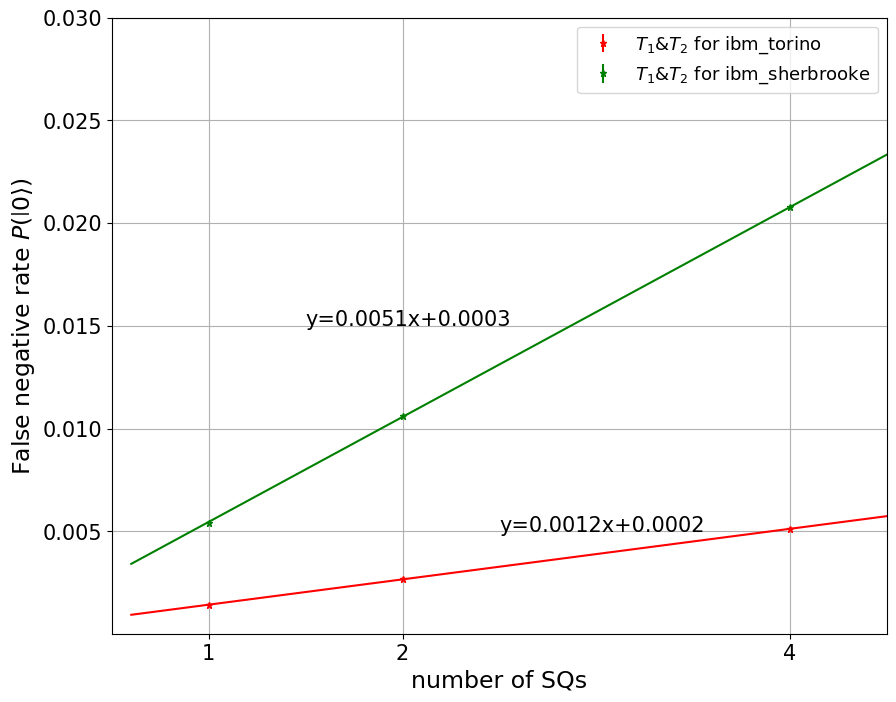

In [24]:
#plt.style.use('classic')
fig, ax = plt.subplots(figsize = (10,8))
num_q_range = [1,2,4]


#with dephasing and damping (torino)
#ax.errorbar(num_q_range, torino_rates_e_3, yerr=2*np.array(torino_rates_e_3_err), label=r'ZZ_rate=$1e-3$ (T1&T2 for ibm_torino)', fmt='o', markersize=5, color='orange')

ax.errorbar(num_q_range, torino, yerr=2*np.array(torino_err), label=r'$T_1&T_2$ for ibm_torino', fmt='*', markersize=5, color='red')
#with dephasing and damping(sherbrooke)

ax.errorbar(num_q_range, sherbrooke, yerr=2*np.array(sherbrooke_err), label=r'$T_1&T_2$ for ibm_sherbrooke', fmt='*', markersize=5, color='green')



fitted_params_torino,_ = opt.curve_fit(lin_fit, num_q_range, torino)
fitted_params_sherbrooke,_ = opt.curve_fit(lin_fit, num_q_range, sherbrooke)


inputs_for_fits = np.linspace(0.6,6.5,100)
ax.plot(inputs_for_fits, lin_fit(inputs_for_fits, *fitted_params_torino), color='red')
ax.plot(inputs_for_fits, lin_fit(inputs_for_fits, *fitted_params_sherbrooke), color='green')
#fitted_params_3,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/3), false_alarm_rate_3, maxfev=10000)
#fitted_params_4,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/4), false_alarm_rate_4, maxfev=10000)
#fitted_params_5,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/5), false_alarm_rate_5, maxfev=10000)
#
##print(fitted_params_2)
#ax[0].plot(ZZ_rates/(pi/2), logit_fit(ZZ_rates/(pi/2), *fitted_params_2))
ax.legend(fontsize=13)
ax.grid()
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(0.5,4.5)
ax.set_xticks([1,2,4])
ax.set_ylim([0.00001,0.03])
#ax.set_ylim([0.00001,0.03])
#a].set_title('With Dephasing and Amplitude Damping', fontsize=15)
ax.annotate(f'y={fitted_params_torino[0]:.4f}x+{fitted_params_torino[1]:.4f}',xy=(2.5,0.005),fontsize=15)
ax.annotate(f'y={fitted_params_sherbrooke[0]:.4f}x+{fitted_params_sherbrooke[1]:.4f}',xy=(1.5,0.015),fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel(r'number of SQs',fontsize=17)
ax.set_ylabel(r"False negative rate $P(\left|0\right>)$",fontsize=17)
fig.savefig('detection_rates_dd/detection failure rate pi4 flat vs SQs.pdf', dpi=300, bbox_inches="tight")

[-0.18539336  0.89770918  3.51173615  0.26160955]


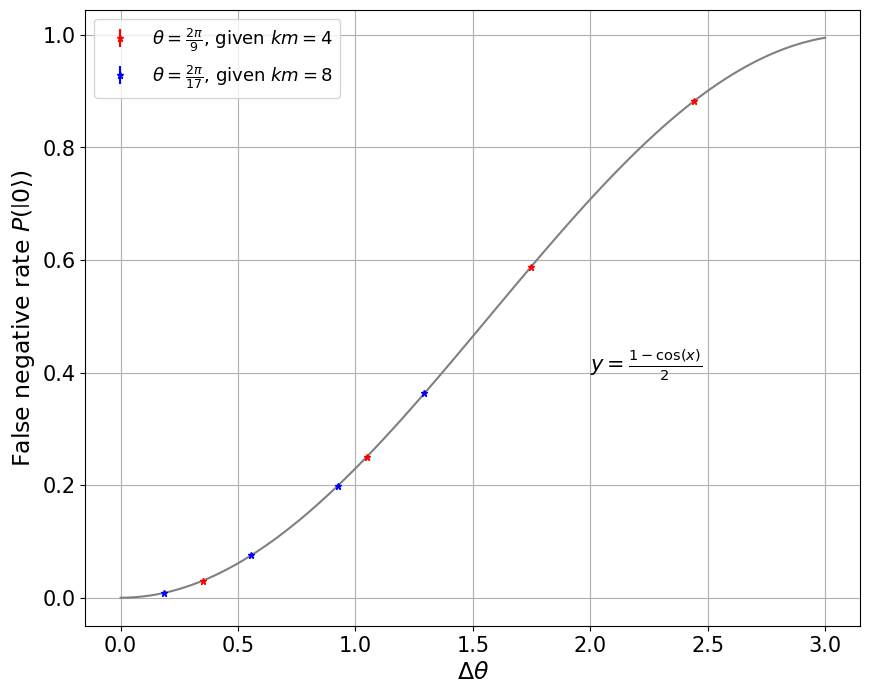

In [25]:
#plt.style.use('classic')
fig, ax = plt.subplots(figsize = (10,8))
#num_q_range = [1,2,4]
#with dephasing and damping (torino)
#ax.errorbar(num_q_range, torino_rates_e_3, yerr=2*np.array(torino_rates_e_3_err), label=r'ZZ_rate=$1e-3$ (T1&T2 for ibm_torino)', fmt='o', markersize=5, color='orange')

ax.errorbar(mk2pi9, pure2pi9, yerr=2*np.array(pure2pi9_err), label=r'$\theta=\frac{2\pi}{9}$, given $km=4$', fmt='*', markersize=5, color='red')
#with dephasing and damping(sherbrooke)

ax.errorbar(mk2pi17, pure2pi17, yerr=2*np.array(pure2pi17_err), label=r'$\theta=\frac{2\pi}{17}$, given $km=8$', fmt='*', markersize=5, color='blue')


fitted_params_2pi9,_ = opt.curve_fit(cos_fit, sorted([4,12,20,28,8,24,40,56]), sorted(pure2pi9+pure2pi17), p0=[-0.5,1,0,0.5])
#fitted_params_2pi17,_ = opt.curve_fit(cos_fit, mk2pi17, pure2pi17)
print(fitted_params_2pi9)

inputs_for_fits = np.linspace(0,3,100)
#ax.plot(inputs_for_fits, cos_fit(inputs_for_fits, *fitted_params_2pi9), color='gray')
ax.plot(inputs_for_fits, cos_fit(inputs_for_fits, *[-0.5,1,0,0.5]), color='gray')
#ax.plot(inputs_for_fits, cos_fit(inputs_for_fits, *fitted_params_2pi17), color='gray')
#fitted_params_3,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/3), false_alarm_rate_3, maxfev=10000)
#fitted_params_4,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/4), false_alarm_rate_4, maxfev=10000)
#fitted_params_5,_ = opt.curve_fit(logit_fit, ZZ_rates/(pi/5), false_alarm_rate_5, maxfev=10000)
#
##print(fitted_params_2)
#ax[0].plot(ZZ_rates/(pi/2), logit_fit(ZZ_rates/(pi/2), *fitted_params_2))
ax.legend(fontsize=13)
ax.grid()
#ax.set_xscale('log')
#ax.set_yscale('log')

#ax.set_xlim(0.5,4.5)
#ax.set_xticks([1,2,4])
#ax.set_ylim([0,1])

#ax.set_ylim([0.00001,0.03])
#a].set_title('With Dephasing and Amplitude Damping', fontsize=15)
ax.annotate(r'$y=\frac{1-\cos(x)}{2}$',xy=(2,0.4),fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel(r'$\Delta\theta$',fontsize=17)
ax.set_ylabel(r"False negative rate $P(\left|0\right>)$",fontsize=17)
fig.savefig('detection_rates_dd/detection failure rate plat vs mk.pdf', dpi=300, bbox_inches="tight")